In [1]:
%pylab inline
import os

def load_testfile(testfile):
    nowf = open(testfile, 'r')
    bigmd_dict = {}
    grid_dict = {}
    while True:
        nowstrs = nowf.readline().split()
        #print (nowstrs)
        if nowstrs == []: break
        values = [float(nowstr) for nowstr in nowstrs[1:]]
        #cosmos = [[values[2*row],values[2*row+1] for row in range(len(values)/2)]
        if 'BigMD' in nowstrs[0]:
            bigmd_dict[nowstrs[0]] = array([[values[2*row],values[2*row+1]] for row in range(int(len(values)/2))])
        else:
            grid_dict[nowstrs[0]] = array([[values[2*row],values[2*row+1]] for row in range(int(len(values)/2))])
    return bigmd_dict, grid_dict

def mean_erbar_str(A, fmt='%.3f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'

def plot_bigmd_dict(bigmd_dict, title=None, do_plot = True):
    om_dft, sig8_dft = 0.307115, 0.8228
    keys = list(bigmd_dict.keys())
    if do_plot:
        fig, ax = subplots(figsize=(10,6))
        ax.scatter([om_dft], [sig8_dft], s=50, marker='*', c='r', 
            label='\ntest_input: \n  ('+str(om_dft)+', '+str(sig8_dft)+')')
    om_sig8s = np.ones((len(keys),2)); ikey = 0
    for key in keys:
        A = bigmd_dict[key]; om_sig8s[ikey,0] = A[:,0].mean(); om_sig8s[ikey,1] = A[:,1].mean(); ikey+=1
        if ikey==1 and do_plot: 
            ax.scatter(A[:,0],A[:,1], c='r', s=5, 
                label='\n\nsubcube_outputs_cosmology1: \n   $\\Omega_m$='+mean_erbar_str(A[:,0])+\
                       '  \n   $\\sigma_8$='+mean_erbar_str(A[:,1]))
    if do_plot:
        ax.scatter(om_sig8s[:,0], om_sig8s[:,1], c='b', s=5, 
                label='\n\ntest_predicts: \n   $\\Omega_m$='+mean_erbar_str(om_sig8s[:,0])+\
                   '  \n   $\\sigma_8$='+mean_erbar_str(om_sig8s[:,1]))
        if title != None: ax.set_title(title,fontsize=14)
        ax.grid(); ax.set_xlabel(r'$\Omega_m$', fontsize=16); 
        ax.set_ylabel(r'$\sigma_8$', fontsize=16); 
        ax.legend(loc='best')
        ax.set_xlim(0.22, 0.35); ax.set_ylim(0.66, 0.88)
    return mean(om_sig8s[:,0]), np.sqrt(om_sig8s[:,0].var()),\
        mean(om_sig8s[:,1]), np.sqrt(om_sig8s[:,1].var())

test_grid = np.loadtxt('/media/xiaodongli/0B9ADFB4341AD2BD/om_As.cosmologies')
oms, sig8s = test_grid[:,0], test_grid[:,2]


def values_from_filename(filename):
    for row in range(len(filename)):
        if filename[row:row+2] == 'om':
            if filename[row+2] not in ['0', '1', '-', ]:
                continue
            else:
                om = float(filename[row+2:row+7])
        elif filename[row:row+2] == 'As':
            if filename[row+2] == '_':
                continue
            else:
                As = float(filename[row+2:row+7])
        elif filename[row:row+3] == 'sig':
            sig8 = float(filename[row+7:row+13])
    return om, As, sig8

def plot_grid_dict(grid_dict, title=None, do_plot = True, polyfit_deg = 8):
    oms, Ass, sig8s, rlts, avg_rlts, doms, dsig8s = [], [], [], [], [], [], []; ikey=0
    if do_plot:
        fig, axs = subplots(1, 3, figsize=(16,5), )
        ax1, ax2, ax3 = axs
    for key in grid_dict.keys():
        om, As, sig8 = values_from_filename(key)
        oms.append(om); Ass.append(As); sig8s.append(sig8)
        rlts.append( np.copy(grid_dict[key]) )
        ommean, sig8mean = grid_dict[key][:,0].mean(), grid_dict[key][:,1].mean()
        avg_rlts.append([ommean, sig8mean])
        doms.append(ommean-om); dsig8s.append(sig8mean-sig8)
        if do_plot and ikey%9==0:
            ax1.scatter([om], [sig8], s=10, marker='o', c='b')
            ax1.scatter([ommean], [sig8mean], s=10, marker='p', c='r')
            ax1.plot([om, ommean], [sig8, sig8mean], ls='-', lw=1, )
        ikey += 1
    if do_plot:
        if title != None: ax1.set_title(title,fontsize=14)
        ax1.set_xlabel(r'$\Omega_m$', fontsize=16); 
        ax1.set_ylabel(r'$\sigma_8$', fontsize=16); 
        ax2.set_xlabel(r'$\Omega_m$', fontsize=16); 
        ax2.set_ylabel(r'$\Delta \Omega_m$', fontsize=16); 
        ax3.set_xlabel(r'$\sigma_8$', fontsize=16); 
        ax3.set_ylabel(r'$\Delta \sigma_8$', fontsize=16); 
        ax1.set_xlim(0.1, 0.5); ax1.set_ylim(0.3, 1.2)
        ax2.scatter(oms, doms, s=3 ); ax3.scatter(sig8s, dsig8s, s=3)
        
        poly1, poly2 = np.polyfit(oms, doms, deg=polyfit_deg), \
            np.polyfit(sig8s, dsig8s, deg=polyfit_deg);
        X1, X2 = np.linspace(min(oms), max(oms), 100), \
            np.linspace(min(sig8s), max(sig8s), 100)
        ax2.plot(X1, np.polyval(poly1, X1)); ax3.plot(X2, np.polyval(poly2, X2))
        
        for ax in [ax1,ax2,ax3]:
            ax.grid(); ax.legend(loc='best')
        
        fig.tight_layout()
    return np.array(oms), np.array(sig8s), np.array(doms), np.array(dsig8s)

fig, ax = subplots(figsize=(5,5))
ax.scatter(oms, sig8s, s= 1.5, marker='o', c='k', linewidths=0, label='training, multi-cosmology test', )

ax.scatter([0.307115],[0.8228],s=35, label='single-cosmology test')
ax.set_xlabel('$\\Omega_m$', fontsize=14)
ax.set_ylabel('$\\sigma_8$', fontsize=14)
ax.legend(frameon=False)
#ax.grid()
fig.savefig('../draft/train_grid.eps', format='eps')

Populating the interactive namespace from numpy and matplotlib


OSError: /media/xiaodongli/0B9ADFB4341AD2BD/om_As.cosmologies not found.

In [5]:
def binned_erbar(y, nbin = 10):
    ys = np.split(y,nbin)
    ymeans = [yy.mean() for yy in ys]
    yers = [np.sqrt(yy.var()) for yy in ys]
    return ymeans, yers

def learningcurve_single(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-', lw=2, x_max = None, marker='o', markersize=5, figsize=None):
    rlts = []; X = []
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=filename_function(var), do_plot=False); 
            rlts.append([om, omer, sig8, sig8er]); X.append(var)
        except:
            pass
    rlts = array(rlts)
    
    if fig == None:
        if figsize==None: figsize=(14,5)
        fig, axs = subplots(1,2, figsize=figsize)
    ax1, ax2 = axs
    ax1.errorbar(X, rlts[:,0], rlts[:,1], label=curve_name, lw=lw,ls=ls,marker=marker,markersize=markersize)
    ax1.plot(X, [0.3071 for xx in X], lw=2, c='k', )
    ax2.errorbar(X, rlts[:,2], rlts[:,3], label=curve_name, lw=lw,ls=ls,marker=marker,markersize=markersize)
    ax2.plot(X, [0.8228 for xx in X], lw=2, c='k')

    #ax1.grid(b=True);ax2.grid(b=True);
    ax1.set_ylabel('$\\Omega_m$', fontsize=18)
    ax2.set_ylabel('$\\sigma_8$', fontsize=18)
    ax1.set_xlabel(var_name, fontsize=18); ax2.set_xlabel(var_name, fontsize=18)
    
    if x_max != None:
        for ax in axs:
            ax.set_xlim(min(X),x_max)
    else:
        for ax in axs:
            ax.set_xlim(min(X),max(X))
        

    ax1.legend(fontsize=16, frameon=False)
    ax2.legend(fontsize=16, frameon=False)
    fig.show()
    return fig, axs, X, rlts

##### default

In [244]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
figsize=(10,6)

fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default architecture',  markersize=3,figsize=figsize)

def filename_function(epochs):
    return 'epochs_xiaodonglaptop/'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default architecture \n (second run)', marker='*', 
                         fig=fig, axs=axs, ls='--', markersize=3,figsize=figsize)
fig.tight_layout()
fig.savefig('../draft/lc_default.eps', format='eps')

##### sgd, max_pooling

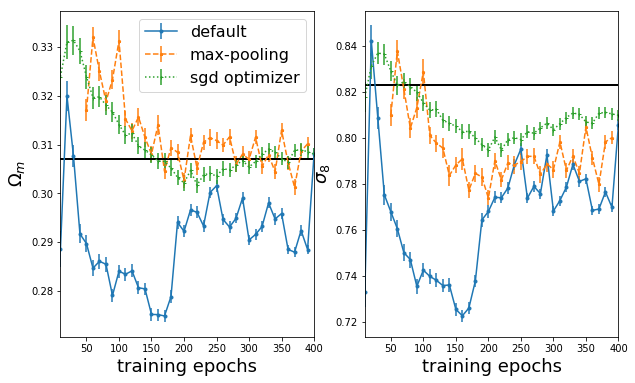

In [224]:
def filename_function(epochs):
    return 'sgd/'+str(epochs)+'.save.test_output'

figsize=(10,6)

def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default',  markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'max_pooling//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(50,400,10), var_name = 'training epochs', 
                  curve_name = 'max-pooling', marker='*', 
                         fig=fig, axs=axs, ls='--', markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'sgd//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'sgd optimizer', marker='+', 
                         fig=fig, axs=axs, ls=':', markersize=3, figsize=figsize)

fig.savefig('../draft/lc_sgdmaxpool.eps', format='eps')

In [225]:

figsize=(10,6)

def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default',  markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'sgd//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(50,400,10), var_name = 'training epochs', 
                  curve_name = 'sgd', marker='*', 
                         fig=fig, axs=axs, ls='--', markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'sgd_lr0.01_momentum0.9//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,1020,10), var_name = 'training epochs', 
                  curve_name = 'sgd_lr0.01_momentum0.9', marker='+', 
                         fig=fig, axs=axs, ls=':', markersize=3, figsize=figsize)

fig.savefig('../draft/lc_diffsgd.eps', format='eps')

##### half_dense, half_filters

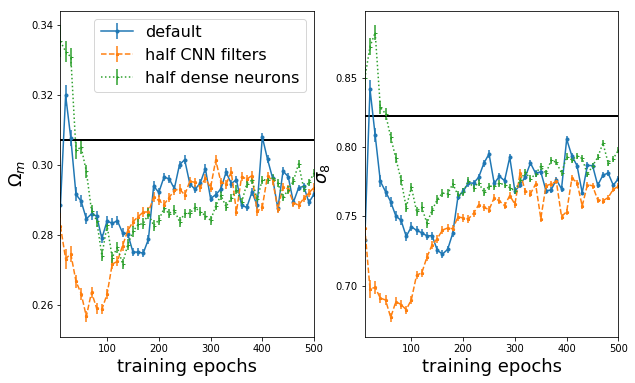

In [240]:
def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default',  markersize=3, figsize=figsize)


def filename_function(epochs):
    return 'half_filters//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'half CNN filters', marker='*', 
                         fig=fig, axs=axs, ls='--', markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'half_dense//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'half dense neurons', marker='+', 
                         fig=fig, axs=axs, ls=':', markersize=3, figsize=figsize)
fig.savefig('../draft/lc_half.eps', format='eps')

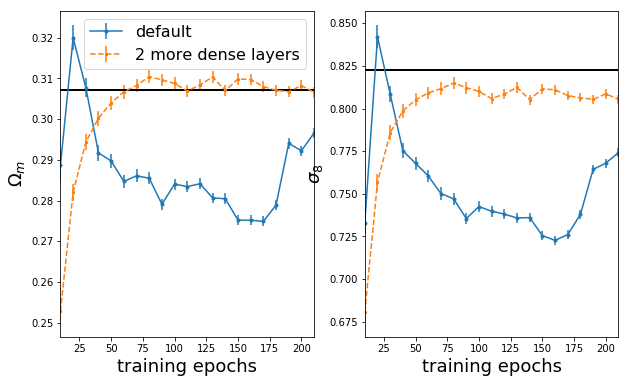

In [239]:
def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = 'default',  markersize=3, figsize=figsize)


def filename_function(epochs):
    return 'sgd_lr0.01_momentum0.9_denseplus//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                  curve_name = '2 more dense layers', marker='*', 
                         fig=fig, axs=axs, ls='--', markersize=3, figsize=figsize)

if False:
    def filename_function(epochs):
        return 'sgd_lr0.05/'+str(epochs)+'.save.test_output'
    fig, axs, X, rlts  = \
        learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', 
                      curve_name = 'sgd, double filters, max-pooling', marker='+', 
                             fig=fig, axs=axs, ls=':', markersize=3, figsize=figsize)
fig.savefig('../draft/lc_more.eps', format='eps')

#### Summarizing Plot

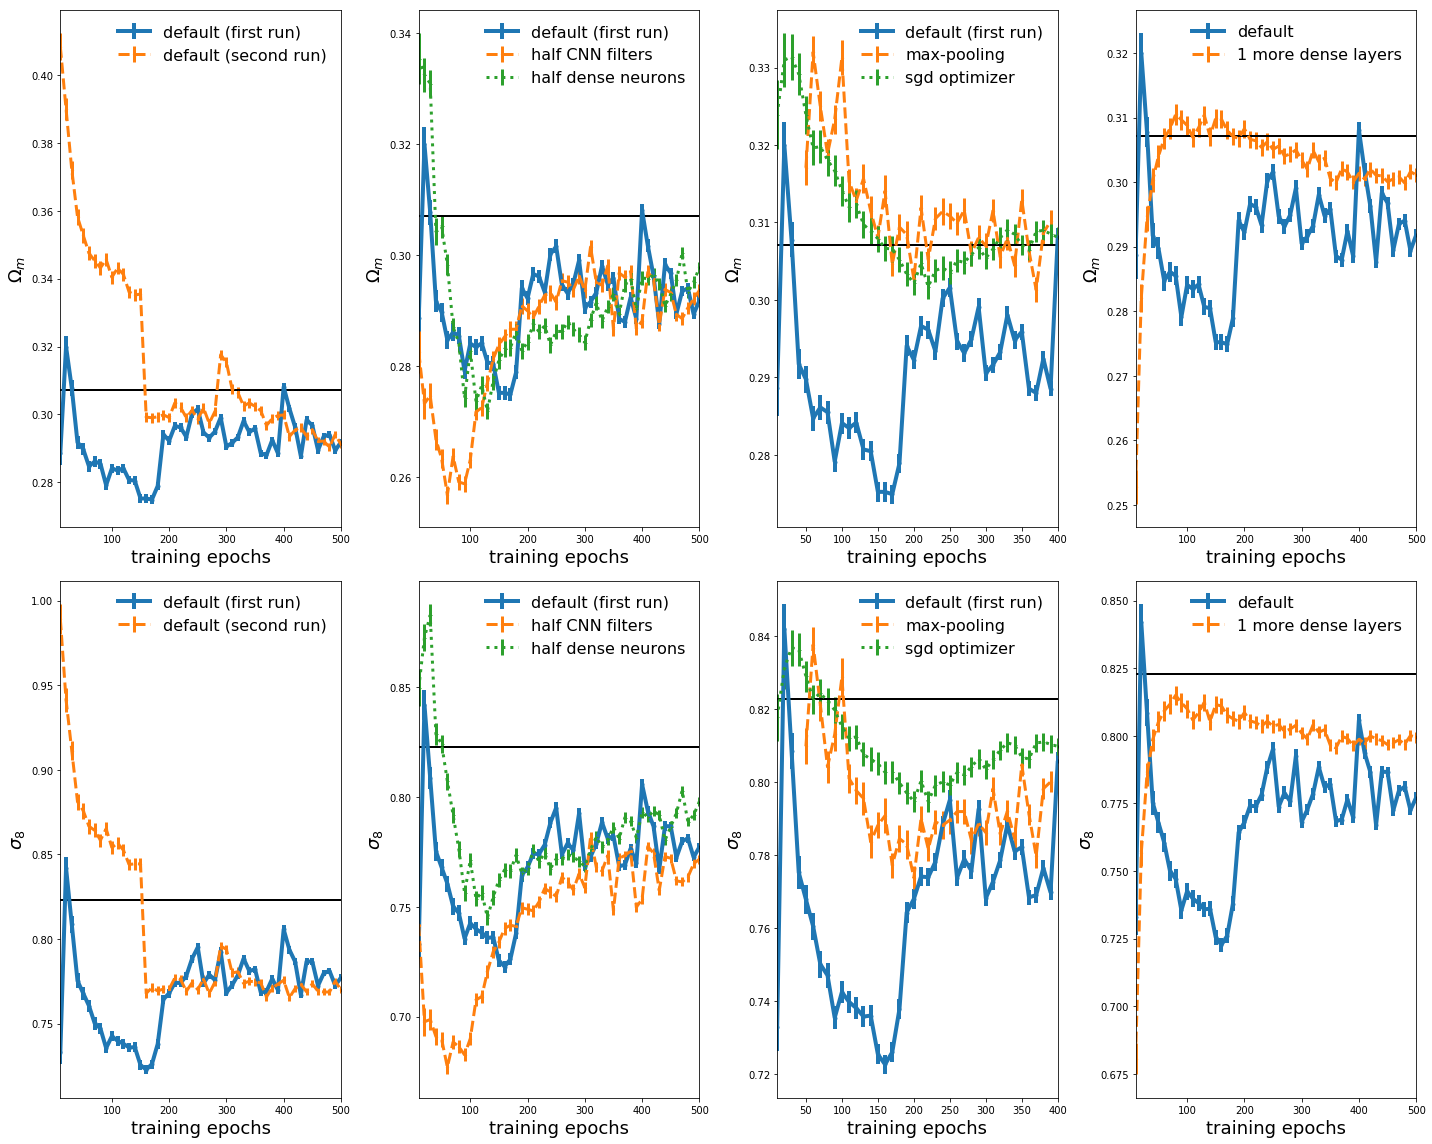

In [9]:
fig0, ax0s = subplots(2, 4, figsize=(20, 16))
ax0s = ax0s.reshape(-1)

lw_dft = 4; lw=3

#####################################################
## 1st comparison
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'

fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', fig=fig0, axs=ax0s[[0,0+4]],
                  lw=lw_dft,curve_name = 'default (first run)',  markersize=3)

def filename_function(epochs):
    return 'epochs_xiaodonglaptop/'+str(epochs)+'.save.test_output'

fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', fig=fig0, axs=ax0s[[0,0+4]],
                  curve_name = 'default (second run)', marker='*', 
                         lw=lw,ls='--', markersize=3)

#####################################################
## second comparison

def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[1,5]], 
                  lw=lw_dft,curve_name = 'default (first run)',  markersize=3, figsize=figsize)


def filename_function(epochs):
    return 'half_filters//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[1,5]],
                  curve_name = 'half CNN filters', marker='*', 
                         lw=lw,ls='--', markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'half_dense//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[1,5]],
                  curve_name = 'half dense neurons', marker='+', 
                         lw=lw,ls=':', markersize=3, figsize=figsize)

#####################################################
## 3rd comparison

def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[2,6]], 
                  lw=lw_dft,curve_name = 'default (first run)',  markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'max_pooling//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(50,400,10), var_name = 'training epochs', fig=fig0,axs=ax0s[[2,6]],
                  curve_name = 'max-pooling', marker='*', 
                         lw=lw,ls='--', markersize=3, figsize=figsize)

def filename_function(epochs):
    return 'sgd//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs', fig=fig0,axs=ax0s[[2,6]],
                  curve_name = 'sgd optimizer', marker='+', 
                         lw=lw,ls=':', markersize=3, figsize=figsize)

#####################################################
### 4th comparison

def filename_function(epochs):
    return 'epochs_test///'+str(epochs)+'.save.test_output'
fig, axs, X, rlts = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[3,7]],
                  lw=lw_dft,curve_name = 'default',  markersize=3, figsize=figsize)


def filename_function(epochs):
    return 'sgd_lr0.01_momentum0.9_denseplus//'+str(epochs)+'.save.test_output'
fig, axs, X, rlts  = \
    learningcurve_single(filename_function, range(10,510,10), var_name = 'training epochs',fig=fig0,axs=ax0s[[3,7]],
                  curve_name = '1 more dense layers', marker='*', 
                         lw=lw,ls='--', markersize=3, figsize=figsize)

fig.tight_layout()

In [10]:
for ax in ax0s[[1,2,3,5,6,7]]:
    ax.set_ylabel('',visible=False)
    #ax.set_yticks([])
for ax in ax0s[[0,1,2,3]]:
    ax.set_xlabel('', visible=False); ax.set_xticks([])
fig0.tight_layout(h_pad = -0.1)
for ax in ax0s:
    for tick in ax.xaxis.get_major_ticks()+ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
fig0.savefig('../draft/lc.eps')

## Multi-Cosmology Test

In [220]:
def plot_grid_dict(grid_dict, title=None, do_plot = True, polyfit_deg = 8):
    oms, Ass, sig8s, rlts, avg_rlts, ommeans, sig8means, doms, dsig8s = [], [], [], [], [], [], [], [], []; ikey=0
    if do_plot:
        #fig, axs = subplots(1, 3, figsize=(12,6), )
        fig = plt.figure(figsize=(12,6))
        ax1 = fig.add_subplot(1,2,1); ax2=fig.add_subplot(2,2,2); ax3=fig.add_subplot(2,2,4); axs=[ax1,ax2,ax3]
        #ax1, ax2, ax3 = axs
    iscatter = 0
    for key in grid_dict.keys():
        om, As, sig8 = values_from_filename(key)
        oms.append(om); Ass.append(As); sig8s.append(sig8)
        rlts.append( np.copy(grid_dict[key]) )
        ommean, sig8mean = grid_dict[key][:,0].mean(), grid_dict[key][:,1].mean()
        avg_rlts.append([ommean, sig8mean])
        doms.append(ommean-om); dsig8s.append(sig8mean-sig8)
        ommeans.append(ommean); sig8means.append(sig8mean)
        if do_plot and ikey%11==0:
            ax1.scatter([om], [sig8], s=18, marker='*', c='r')
            ax1.scatter([ommean], [sig8mean], s=10, marker='o', c='b')
            if iscatter == 0:
                ax1.scatter([om], [sig8], s=18, marker='*', c='r', label = 'Ground truth')
                ax1.scatter([ommean], [sig8mean], s=12, marker='o', c='b', label = 'CNN prediction')
            ax1.plot([om, ommean], [sig8, sig8mean], ls='-', lw=1, c='k' )
            iscatter += 1
        ikey += 1
    if do_plot:
        if title != None: ax1.set_title(title,fontsize=14)
        ax1.set_xlabel(r'$\Omega_m$', fontsize=16); 
        ax1.set_ylabel(r'$\sigma_8$', fontsize=16); 
        ax2.set_xlabel(r'$\Omega_m,\ \rm ground\ truth$', fontsize=16); 
        ax2.set_ylabel(r'$\Omega_m,\ \rm CNN\ prediction$', fontsize=16); 
        ax3.set_xlabel(r'$\sigma_8,\ \rm ground\ truth$', fontsize=16); 
        ax3.set_ylabel(r'$\sigma_8,\ \rm CNN\ prediction$', fontsize=16); 
        ax1.set_xlim(0.1, 0.5); ax1.set_ylim(0.3, 1.2)
        ax2.scatter(oms, ommeans, s=1, marker='*',c='k' ); ax3.scatter(sig8s, sig8means, s=1, marker='*',c='k')
        ax2.plot(oms, oms, c='k' ); ax3.plot(sig8s, sig8s, c='k' )
        ax1.set_xlim(min(oms)*0.93, max(oms)*1.02); ax1.set_ylim(min(sig8s)*0.93, max(sig8s)*1.02); 
        ax2.set_xlim(min(oms), max(oms)); ax2.set_ylim(min(oms), max(oms)); 
        ax3.set_xlim(min(sig8s), max(sig8s)); ax3.set_ylim(min(sig8s), max(sig8s)); 
        
        if False:
            poly1, poly2 = np.polyfit(oms, doms, deg=polyfit_deg), \
                np.polyfit(sig8s, dsig8s, deg=polyfit_deg);
            X1, X2 = np.linspace(min(oms), max(oms), 100), \
                np.linspace(min(sig8s), max(sig8s), 100)
            ax2.plot(X1, np.polyval(poly1, X1)); ax3.plot(X2, np.polyval(poly2, X2))
        
        for ax in [ax1, ax2, ax3]:
            pass; #ax.grid(); 
        ax1.legend(loc='best', fontsize=14, frameon=False)
        
        fig.tight_layout()
    return fig, axs, np.array(oms), np.array(sig8s), np.array(doms), np.array(dsig8s)
if True:
    file = 'sgd/290.save.test_output'
    bigmd_dict, grid_dict = load_testfile(file)
    #oms, sig8s, doms, dsig8s = plot_grid_dict(grid_dict, title=file)
    fig, axs, oms, sig8s, doms, dsig8s =  plot_grid_dict(grid_dict, title=None)
    fig.savefig('../draft/multi_cosmology.eps', format='eps')

In [219]:
def label_str(coef, intercept):
    return r'$%.2f'%coef[0]+' \Omega_m  %.2f'%coef[1]+\
    '\Omega_m^2 + %.2f'%coef[2]+'\Omega_m^3 $ \n$ %.2f'%coef[3]+ \
    '\sigma_8 + %.2f'%coef[4]+'\sigma_8^2  %.2f'%coef[5]+'\sigma_8^3 + %.2f'%intercept+'$'

X = np.column_stack([ oms, oms**2.0, oms**3.0, sig8s, sig8s**2.0, sig8s**3.0, ])
ya = doms; yb = dsig8s

import sklearn
from sklearn import linear_model
model = linear_model.LinearRegression()

fig, axs = subplots(1,2,figsize=(17,6)); axa, axb = axs
for y1 in [ya, yb]:
    model.fit(X, y1)
    y1_predict = model.predict(X)
    if y1 is ya:
        ax1 = axa; labelstr = '\\Omega_m'
    else:
        ax1 = axb; labelstr = '\\sigma_8'
    ax1.scatter(y1, y1_predict, label = label_str(model.coef_, model.intercept_), s=8); 
    ax1.plot(y1,y1, lw=3, c='r')
    model.coef_, model.intercept_, np.dot(model.coef_, X[2])+model.intercept_, y1_predict[2]
    ax1.text(0.03, 0.85,  '$\\Delta'+labelstr+'\\approx$'+label_str(model.coef_, model.intercept_), 
             transform=ax1.transAxes, fontsize=13,)
    ax1.set_xlabel('$\\Delta '+labelstr+'$', fontsize=18)
    ax1.set_ylabel('$\\Delta '+labelstr+',\\ \\rm fitting\\ formular$', fontsize=18)
    ax1.set_xlim(min(y1), max(y1)); ax1.set_ylim(min(y1), max(y1)); #ax1.grid()
    print(mean(abs(y1)))
fig.savefig('../draft/bias.eps', format='eps')

0.009802752299058408
0.01764213254503275


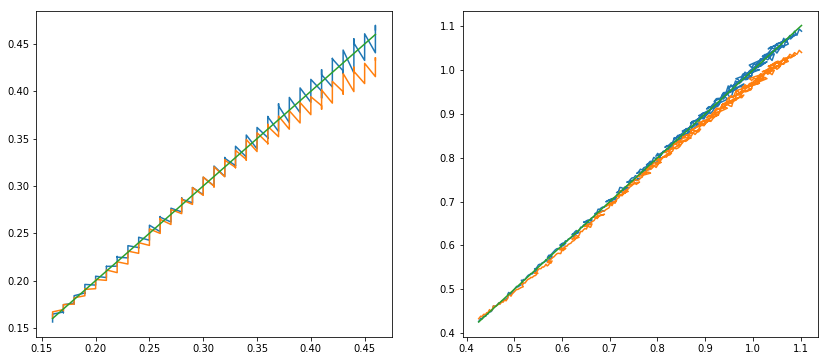

In [46]:
from sklearn import neural_network,neighbors, linear_model
#corect_model = neural_network.MLPRegressor((2048,),)
correct_model = linear_model.LinearRegression()
#corect_model = neighbors.KNeighborsRegressor(n_neighbors=15)
if False:
    X, y = np.column_stack([oms+doms, (oms+doms)**2.0, (oms+doms)**3.0,  (oms+doms)**4.0,\
                        sig8s+dsig8s, (sig8s+dsig8s)**2.0, (sig8s+dsig8s)**3.0, (sig8s+dsig8s)**4.0]), np.column_stack([oms, sig8s])
else:
    X, y = np.column_stack([oms+doms, (oms+doms)**2.0, (oms+doms)**3.0,\
                        sig8s+dsig8s, (sig8s+dsig8s)**2.0, (sig8s+dsig8s)**3.0,]), np.column_stack([oms, sig8s])


correct_model.fit(X, y)
y_predict = correct_model.predict(X)
oms2, sig8s2 = y_predict[:,0], y_predict[:,1]
fig, axs = subplots(1,2, figsize=(14,6)); ax1, ax2 = axs
ax1.plot(oms, oms2)
ax1.plot(oms, oms+doms)
ax1.plot(oms, oms)
ax2.plot(sig8s, sig8s2)
ax2.plot(sig8s, sig8s+dsig8s)
ax2.plot(sig8s, sig8s)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned


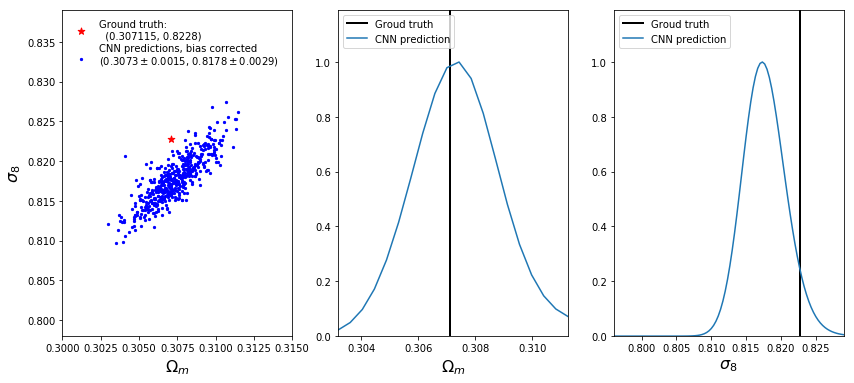

In [321]:
def plot_bigmd_dict_draft(bigmd_dict, title=None, do_plot = True, cr_model = None):
    xfontsize = 16
    om_dft, sig8_dft = 0.307115, 0.8228
    keys = list(bigmd_dict.keys())
    fig, axs = subplots(1,3,figsize=(14,6))
    ax,axa,axb= axs
    ax.scatter([om_dft], [sig8_dft], s=50, marker='*', c='r', 
            label='Ground truth: \n  ('+str(om_dft)+', '+str(sig8_dft)+')')
    om_sig8s = np.ones((len(keys),2)); ikey = 0
    for key in keys:
        A = bigmd_dict[key]; om_sig8s[ikey,0] = A[:,0].mean(); om_sig8s[ikey,1] = A[:,1].mean(); ikey+=1
        if ikey==0: 
            ax.scatter(A[:,0],A[:,1], c='r', s=5, 
                label='\n\nsubcube_outputs_cosmology1: \n   $\\Omega_m$='+mean_erbar_str(A[:,0])+\
                       '  \n   $\\sigma_8$='+mean_erbar_str(A[:,1]))
    if cr_model != None:
        try:
            om_sig8s = cr_model.predict(om_sig8s)
        except:
            x1, x2 = om_sig8s[:,0], om_sig8s[:,1]
            try:
                om_sig8s = cr_model.predict(np.column_stack([x1, x1**2., x1**3., x1**4., x2, x2**2., x2**3., x2**4.,]))
            except:
                om_sig8s = cr_model.predict(np.column_stack([x1, x1**2., x1**3., x2, x2**2., x2**3., ]))
    nowlab = 'CNN predictions\n('+mean_erbar_str(om_sig8s[:,0], '%.4f')+', '+mean_erbar_str(om_sig8s[:,1], '%.4f')+')'
    if cr_model!= None: 
        nowlab = 'CNN predictions, bias corrected\n('+mean_erbar_str(om_sig8s[:,0], '%.4f')+', '+mean_erbar_str(om_sig8s[:,1], '%.4f')+')'
    ax.scatter(om_sig8s[:,0], om_sig8s[:,1], c='b', s=5, label=nowlab)
                #label='\n\ntest_predicts: \n   $\\Omega_m$='+mean_erbar_str(om_sig8s[:,0])+\
                #   '  \n   $\\sigma_8$='+mean_erbar_str(om_sig8s[:,1]))
    #ax.grid();
    ax.set_xlabel(r'$\Omega_m$', fontsize=xfontsize); 
    ax.set_ylabel(r'$\sigma_8$', fontsize=xfontsize); 
    ax.legend(loc='upper left', frameon=False); ax.set_xlim(0.30, 0.315); ax.set_ylim(0.798, 0.839)

    axa.plot([om_dft, om_dft], [0,1.5], lw=2, c='k', label='Groud truth')
    rlt = np.histogram(om_sig8s[:,0], bins=20); 
    y, x = rlt[0], rlt[1][1:]; x = x-(x[1]-x[0])/2.; 
    vals = polyfit(x,log(y), deg=8); yy = exp(polyval(vals, x));  #y = y/max(y); axa.plot(x,y);
    yy = yy / max(yy);  axa.plot(x,yy, label='CNN prediction'); axa.set_xlim(min(x), max(x)); axa.set_ylim(0,1.19)
    axa.set_xlabel(r'$\Omega_m$',fontsize=xfontsize)
    
    axb.plot([sig8_dft, sig8_dft], [0,1.5], lw=2, c='k', label='Groud truth')
    rlt = np.histogram(om_sig8s[:,1], bins=20); 
    y, x = rlt[0], rlt[1][1:]; x = x-(x[1]-x[0])/2.; 
    vals = polyfit(x,log(y), deg=3); 
    x = np.linspace(0.796, 0.829, 100)
    yy = exp(polyval(vals, x));  #y = y/max(y); axa.plot(x,y);
    yy = yy / max(yy);  axb.plot(x,yy, label='CNN prediction'); axb.set_xlim(min(x), 0.829); axb.set_ylim(0,1.19)
    axb.set_xlabel(r'$\sigma_8$',fontsize=xfontsize)
    #axb.set_xticks([0.80, 0.805, 0.81,]); 
    
    for ax in [axa,axb]: 
        ax.legend(loc='upper left')#ax.grid(); ax.set_yticklabels([])
    return fig, ax, mean(om_sig8s[:,0]), np.sqrt(om_sig8s[:,0].var()),\
        mean(om_sig8s[:,1]), np.sqrt(om_sig8s[:,1].var())
fig, ax, ommean, omer, sig8mean, sig8er = plot_bigmd_dict_draft(bigmd_dict, cr_model=None)
fig, ax, ommean, omer, sig8mean, sig8er = plot_bigmd_dict_draft(bigmd_dict, cr_model=correct_model)
fig.savefig('../draft/bigmd_rlt.eps', format='eps')

## Error-tolerance

In [51]:
lsstr = "ls /media/xiaodongli/0B9ADFB4341AD2BD/om_As/"

def cosmostr(om, As):
    return 'om%.3f' % om + '_As%.3f' % As

def snpfiles(cosmology, snpstr='c'):  #
    return os.popen(lsstr + cosmology + "*snap*" + snpstr + ".*").read().split()

def gridfiles(cosmology, snpstr='c'):
    return os.popen(lsstr + cosmology + "*grid*" + snpstr + ".*").read().split()

def mocklist():
    files = os.popen(lsstr + "om*.lua").read().split('\n')
    # *代替多个字母,即列出所有符合条件的.lua文件:om...
    cosmologies = []  # 宇宙学参数
    mocks = {}  # 模拟测试
    ifile = 0  # 有效文件
    for nowfile in files:
        # str[a:b]不存在时,返回'',不存在则忽略
        nowstr = nowfile[-39:-10]
        if nowstr == '':
            continue
        cosmologies.append(nowstr[0:15])
        ifile += 1
        try:
            mocks[nowstr[0:15]] = {'om': float(nowstr[2:7]), 'As': float(nowstr[10:15]),
                                   'sigma8': float(nowstr[23:29])}
            # 添加随机数种子
            ranseed = float(open(nowfile, 'r').readline().split()[2])  # 默认以所有空字符为分隔符,包括空格,\n,\t
            mocks[nowstr[0:15]]['ranseed'] = int(ranseed)
            # print(ranseed)
        except:
            pass
    return cosmologies, files, mocks

gridfile_dict = {}

cosmologies, filenames, infos = mocklist()
print('In total ', len(cosmologies), 'cosmologies')

print('Build up gridfile_dict... (for speed-up of load_grid()) ')
for cosmology in cosmologies:
    rlt = gridfiles(cosmology)
    if rlt == []:
        print ('\tmissing cosmology!', cosmology)
    else:
        gridfile_dict[cosmology] = rlt[0]
np.random.shuffle(cosmologies)

In total  465 cosmologies
Build up gridfile_dict... (for speed-up of load_grid()) 
	missing cosmology! om0.180_As2.040
	missing cosmology! om0.180_As2.100
	missing cosmology! om0.180_As2.120
	missing cosmology! om0.180_As2.140
	missing cosmology! om0.180_As2.200
	missing cosmology! om0.180_As2.220
	missing cosmology! om0.180_As2.260


In [52]:
import keras, os, pynbody, struct
def load_grid(gridfile, snpstr='c', printinfo=False):  # 网格加载
    #gridfile = os.popen(lsstr + "om%.3f" % om + "_As2.000_sigma8_*grid*" + snpstr + ".*").read().split()[0]
    nowf = open(gridfile, 'rb')  # 以二进制形式读取文件
    # struct:对python基本类型值与用python字符串格式表示的C struct类型间转化
    size = struct.unpack('f' * 1, nowf.read(4 * 1))[0]
    grid_nc = struct.unpack('i' * 1, nowf.read(4 * 1))[0]
    data = struct.unpack('f' * grid_nc ** 3, nowf.read(4 * grid_nc ** 3))
    if printinfo:
        print('read in box size     \n\t', size)
        print('read in num_grid      \n\t', grid_nc)
        print('read in coarse grid \n\tsize    : ', len(data), '\n\texpect  : ', grid_nc ** 3)

    nowf.close()
    return np.array(data).reshape((grid_nc, grid_nc, grid_nc))

def values_from_filename(filename):
    for row in range(len(filename)):
        if filename[row:row+2] == 'om':
            if filename[row+2] not in ['0', '1', '-', ]:
                continue
            else:
                om = float(filename[row+2:row+7])
        elif filename[row:row+2] == 'As':
            if filename[row+2] not in ['2', '1', '3', ]:
                continue
            else:
                As = float(filename[row+2:row+7])
        elif filename[row:row+3] == 'sig':
            sig8 = float(filename[row+7:row+13])
    return om, As, sig8
def subcubes(A):
    rlt = []
    for row1 in [0, 32, 64, 96]:
        for row2 in [0, 32, 64, 96]:
            for row3 in [0, 32, 64, 96]:
                rlt.append(A[row1:row1+32,row2:row2+32,row3:row3+32])
    return rlt

Using TensorFlow backend.


##### A plot for all

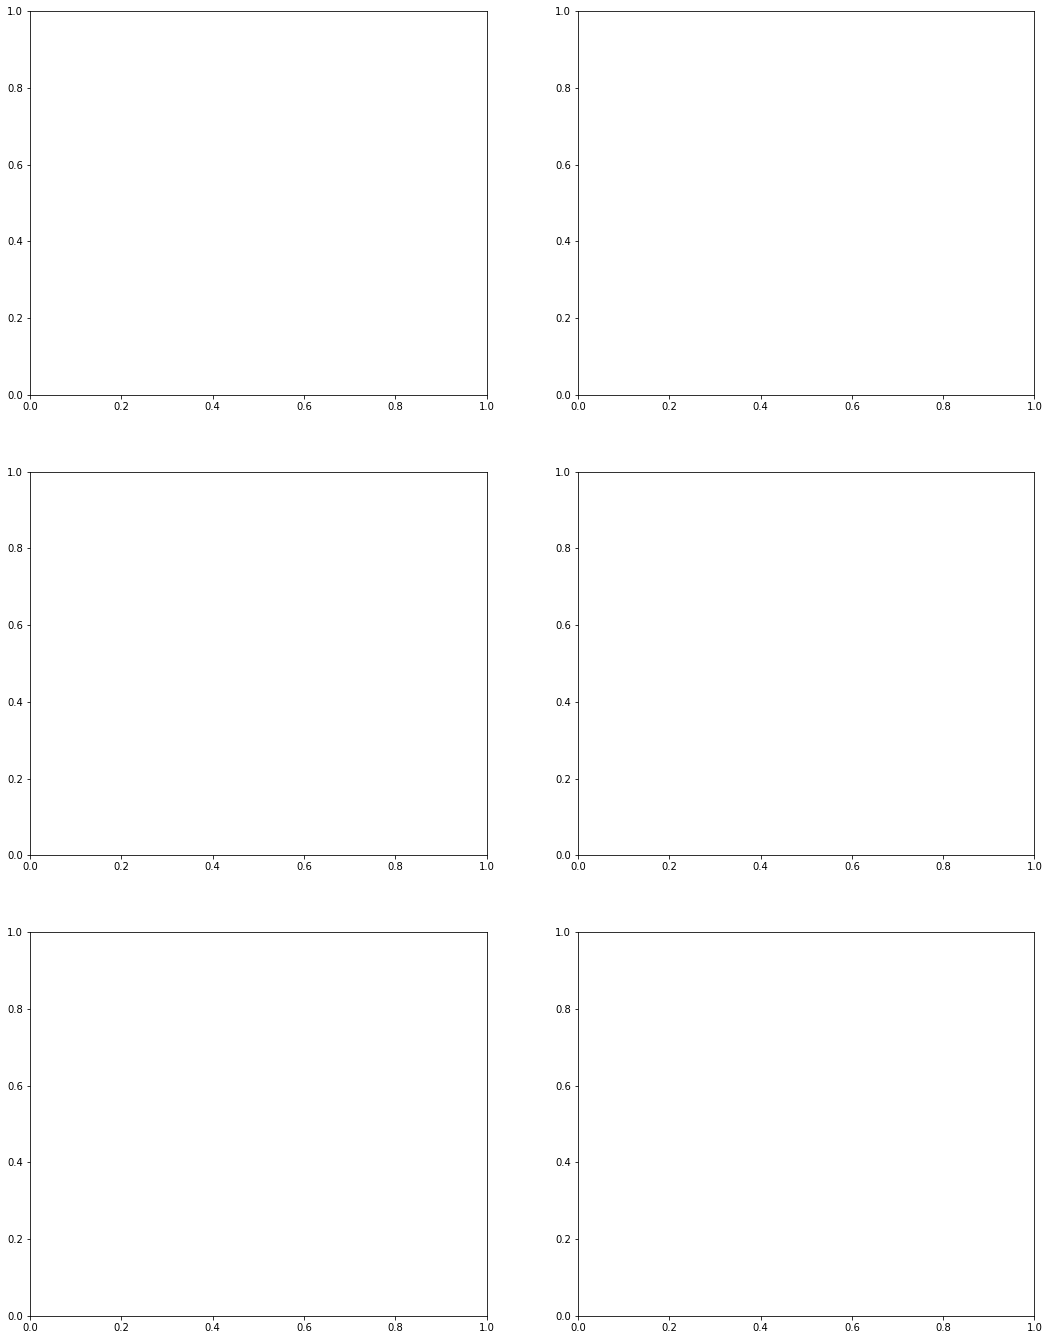

In [199]:
fig0, ax0s = plt.subplots(3,2, figsize=(18,24))
ax0s = ax0s.reshape(-1)

##### smoothing

In [200]:
#nowfile = gridfile_dict[cosmologies[0]]
#data = load_grid(nowfile)

nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/om_As_test/om0.260_As2.000_sigma8_0.6918_grid10150c.b'
data = load_grid(nowfile)

model = keras.models.load_model('sgd/300.save')

def smooth_nowdata(nowdata, frac=0.01):
    data2 = np.ones(nowdata.shape)
    n = len(data2)
    def norm(i):
        if i >= n:
            return i-n
        elif i<0:
            return i+n
        else:
            return i
    for i in range(len(nowdata)):
        for j in range(len(nowdata[i])):
            for k in range(len(nowdata[j])):
                i1 = i-1; i2 = i+1; j1 = j-1; j2 = j+1; k1=k-1; k2=k+1;
                i1=norm(i1);j1=norm(j1);k1=norm(k1);
                i2=norm(i2);j2=norm(j2);k2=norm(k2);
                data2[i,j,k] = nowdata[i,j,k]+frac*(nowdata[i1,j,k]+nowdata[i2,j,k]+nowdata[i,j1,k]\
                    +nowdata[i,j2,k]+nowdata[i,j,k1]+nowdata[i,j,k2]) / (1+frac*6)
    return data2

rlts = []; rlts2 = []; rlts3=[]
for nowdata in subcubes(data):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
    rlts2.append(model.predict(smooth_nowdata(nowdata,0.01).reshape(-1,32,32,32,1)))
    rlts3.append(model.predict(smooth_nowdata(nowdata,0.03).reshape(-1,32,32,32,1)))
    
## make plot    
    
om, As, sig8 = values_from_filename(nowfile)

rlts = np.array(rlts)
rlts2 = np.array(rlts2)
rlts3 = np.array(rlts3)

def mean_erbar_str(A, fmt='%.2f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'

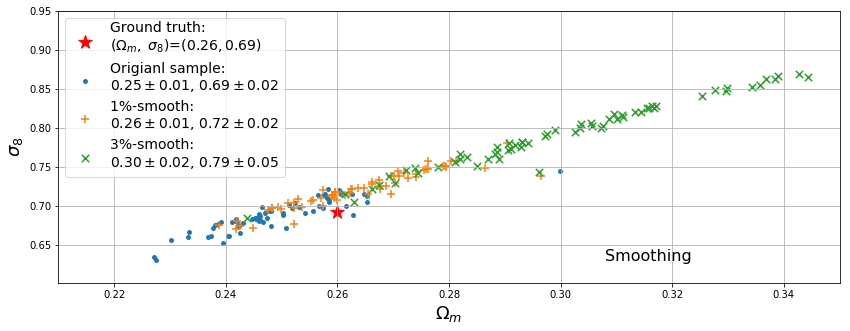

In [201]:
fig, ax1 = subplots(figsize=(14,5))

for ax in [ax1, ax0s[0]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')
    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Origianl sample: \n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=15, )
    ax.scatter(rlts2[:,0,0], rlts2[:,0,1], label ='1%-smooth: \n'+\
               mean_erbar_str(rlts2[:,0,0])+', '+mean_erbar_str(rlts2[:,0,1]), s=55, marker='+')
    ax.scatter(rlts3[:,0,0], rlts3[:,0,1], label ='3%-smooth: \n'+\
               mean_erbar_str(rlts3[:,0,0])+', '+mean_erbar_str(rlts3[:,0,1]), s=55,  marker='x')
    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    ax.set_xlim(0.21, 0.35); ax.set_ylim(0.601, 0.95)
    
    ax.grid()
    #ax.text(0.45, 0.08, 'Smoothing test: predictions on 64 $32^3$-subcubes', transform=ax.transAxes, fontsize=16)
    ax.text(0.7, 0.08, 'Smoothing', transform=ax.transAxes, fontsize=16)
    if ax == ax1:
        ax.legend(fontsize=14)
    elif ax == ax0s[0]:
        ax.legend(fontsize=12, frameon=False)
#fig
fig.savefig('../draft/test_smooth.eps', format='eps')

##### mask

In [202]:
#nowfile = gridfile_dict[cosmologies[0]]
#data = load_grid(nowfile)

nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/om_As_test/om0.260_As2.000_sigma8_0.6918_grid10150c.b'
data = load_grid(nowfile)

model = keras.models.load_model('sgd/300.save')

data2 = np.copy(data);
i = j = k = 12
for i1 in [0, 32, 64, 96]:
    for i2 in [0, 32, 64, 96]:
        for i3 in [0, 32, 64, 96]:
            data2[i1+i,i2+j,i3+k] = 0
#data2[] = 0;

data3 = np.copy(data)
for i1 in [0, 32, 64, 96]:
    for i2 in [0, 32, 64, 96]:
        for i3 in [0, 32, 64, 96]:
            for i in [11,12,13,14]:
                for j in [11,12,13,14]:
                    for k in [11,12,13,14]:
                        data3[i1+i,i2+j,i3+k] = 0

rlts = []; rlts2 = []; rlts3=[]
for nowdata in subcubes(data):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data2):
    rlts2.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data3):
    rlts3.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
    
## make plot    
    
om, As, sig8 = values_from_filename(nowfile)

rlts = np.array(rlts)
rlts2 = np.array(rlts2)
rlts3 = np.array(rlts3)

def mean_erbar_str(A, fmt='%.2f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'



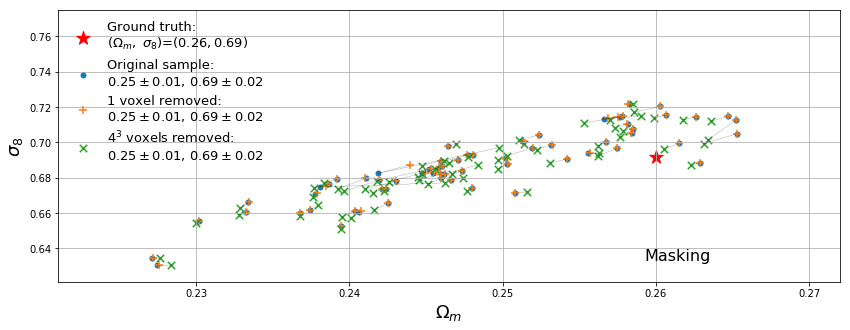

In [203]:
fig, ax1 = subplots(figsize=(14,5))
for ax in [ax1, ax0s[1]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')

    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Original sample: \n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=25, )
    ax.scatter(rlts2[:,0,0], rlts2[:,0,1], label ='1 voxel removed: \n'+\
               mean_erbar_str(rlts2[:,0,0])+', '+mean_erbar_str(rlts2[:,0,1]), s=55, marker='+')
    ax.scatter(rlts3[:,0,0], rlts3[:,0,1], label ='$4^3$ voxels removed: \n'+\
               mean_erbar_str(rlts3[:,0,0])+', '+mean_erbar_str(rlts3[:,0,1]), s=55,  marker='x')

    for row in range(len(rlts[:,0,0])):
        ax.plot([rlts[row,0,0],rlts2[row,0,0]], [rlts[row,0,1],rlts2[row,0,1]], c='k', lw=0.15)
        ax.plot([rlts[row,0,0],rlts3[row,0,0]], [rlts[row,0,1],rlts3[row,0,1]], c='k', lw=0.15)


    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    ax.set_xlim(0.221, 0.272); ax.set_ylim(0.621, 0.775)
    #ax.scatter([om], [sig8], s=1050, marker='*', label='Ground truth: $(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')
    ax.grid()
    ax.text(0.75, 0.08, 'Masking', transform=ax.transAxes, fontsize=16)
    ax.legend(fontsize=13, loc='upper left', frameon=False)
    #fig
    fig.savefig('../draft/test_mask.eps', format='eps')

##### Global change test

In [204]:
#nowfile = gridfile_dict[cosmologies[0]]
#data = load_grid(nowfile)

nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/om_As_test/om0.260_As2.000_sigma8_0.6918_grid10150c.b'
data = load_grid(nowfile)

model = keras.models.load_model('sgd/300.save')


data2 = data * np.linspace(1, 1.05, len(data))
data3 = data * np.linspace(1, 1.1, len(data))

#data2[] = 0;


rlts = []; rlts2 = []; rlts3=[]
for nowdata in subcubes(data):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data2):
    rlts2.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data3):
    rlts3.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
    
## make plot    
    
om, As, sig8 = values_from_filename(nowfile)

rlts = np.array(rlts)
rlts2 = np.array(rlts2)
rlts3 = np.array(rlts3)

def mean_erbar_str(A, fmt='%.2f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'

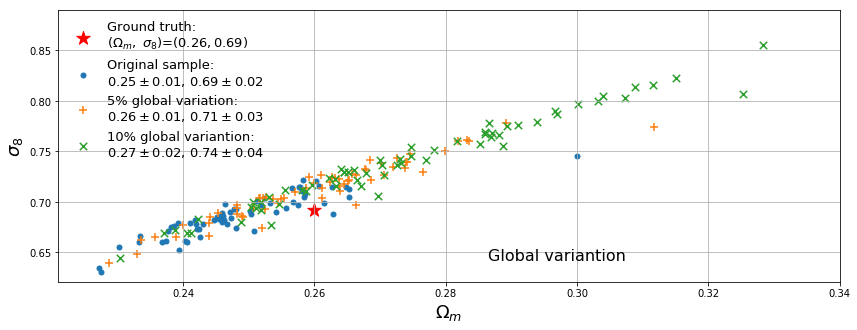

In [205]:
fig, ax1 = subplots(figsize=(14,5))

for ax in [ax1, ax0s[2]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')

    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Original sample: \n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=25, )
    ax.scatter(rlts2[:,0,0], rlts2[:,0,1], label ='5% global variation: \n'+\
               mean_erbar_str(rlts2[:,0,0])+', '+mean_erbar_str(rlts2[:,0,1]), s=55, marker='+')
    ax.scatter(rlts3[:,0,0], rlts3[:,0,1], label ='10% global variantion: \n'+\
               mean_erbar_str(rlts3[:,0,0])+', '+mean_erbar_str(rlts3[:,0,1]), s=55,  marker='x')

    #for row in range(len(rlts[:,0,0])):
    #    ax.plot([rlts[row,0,0],rlts2[row,0,0]], [rlts[row,0,1],rlts2[row,0,1]], c='k', lw=0.15)
    #    ax.plot([rlts[row,0,0],rlts3[row,0,0]], [rlts[row,0,1],rlts3[row,0,1]], c='k', lw=0.15)


    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    ax.set_xlim(0.221, 0.34); ax.set_ylim(0.621, 0.89)
    #ax.scatter([om], [sig8], s=1050, marker='*', label='Ground truth: $(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')
    ax.grid()
    ax.text(0.55, 0.08, 'Global variantion', transform=ax.transAxes, fontsize=16)
    ax.legend(fontsize=13, loc='upper left', frameon=False)
    #fig
    fig.savefig('../draft/test_globalchange.eps', format='eps')

##### Random noise test

In [206]:
#nowfile = gridfile_dict[cosmologies[0]]
#data = load_grid(nowfile)

nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/om_As_test/om0.260_As2.000_sigma8_0.6918_grid10150c.b'
data = load_grid(nowfile)

model = keras.models.load_model('sgd/300.save')


data2 = data * np.random.normal(1, 0.05, data.shape);
data3 = data * np.random.normal(1, 0.10, data.shape);

#data2[] = 0;


rlts = []; rlts2 = []; rlts3=[]
for nowdata in subcubes(data):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data2):
    rlts2.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(data3):
    rlts3.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
    
## make plot    
    
om, As, sig8 = values_from_filename(nowfile)

rlts = np.array(rlts)
rlts2 = np.array(rlts2)
rlts3 = np.array(rlts3)

def mean_erbar_str(A, fmt='%.2f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'



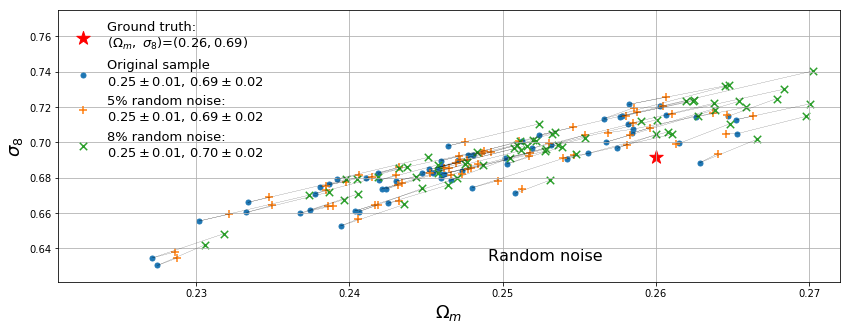

In [207]:
fig, ax1 = subplots(figsize=(14,5))
for ax in [ax1, ax0s[3]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')

    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Original sample\n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=25, )
    ax.scatter(rlts2[:,0,0], rlts2[:,0,1], label ='5% random noise:\n'+\
               mean_erbar_str(rlts2[:,0,0])+', '+mean_erbar_str(rlts2[:,0,1]), s=55, marker='+')
    ax.scatter(rlts3[:,0,0], rlts3[:,0,1], label ='8% random noise:\n'+\
               mean_erbar_str(rlts3[:,0,0])+', '+mean_erbar_str(rlts3[:,0,1]), s=55,  marker='x')

    for row in range(len(rlts[:,0,0])):
        ax.plot([rlts[row,0,0],rlts2[row,0,0]], [rlts[row,0,1],rlts2[row,0,1]], c='k', lw=0.15)
        ax.plot([rlts[row,0,0],rlts3[row,0,0]], [rlts[row,0,1],rlts3[row,0,1]], c='k', lw=0.15)


    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    ax.set_xlim(0.221, 0.272); ax.set_ylim(0.621, 0.775)
    #ax.scatter([om], [sig8], s=1050, marker='*', label='Ground truth: $(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')
    ax.grid()
    ax.text(0.55, 0.08, 'Random noise', transform=ax.transAxes, fontsize=16)
    ax.legend(fontsize=13, loc='upper left', frameon=False)
    #fig
    fig.savefig('../draft/test_noise.eps', format='eps')

##### Data Enhancement

In [208]:
def symmetric(mat, X):
        size = len(mat)
        mat1, mat2, mat3, mat4, mat5, mat6, mat7 = np.zeros((size, size, size)),np.zeros((size, size, size)),np.zeros((size, size, size)),np.zeros((size, size, size)),np.zeros((size, size, size)),np.zeros((size, size, size)),np.zeros((size, size, size))
        for i in range(size):
            for j in range(size):
                for k in range(size):
                    mat1[i][j][k] = mat[size-1-i][j][k]
                    mat2[i][j][k] = mat[size-1-i][size-1-j][k]
                    mat3[i][j][k] = mat[size-1-i][size-1-j][size-1-k]
                    mat4[i][j][k] = mat[size-1-i][j][size-1-k]
                    mat5[i][j][k] = mat[i][size-1-j][size-1-k]
                    mat6[i][j][k] = mat[i][size-1-j][k]
                    mat7[i][j][k] = mat[i][j][size-1-k]
        X.append(mat)
        X.append(mat1)
        X.append(mat2)
        X.append(mat3)
        X.append(mat4)
        X.append(mat5)
        X.append(mat6)
        X.append(mat7)
def dataEnhance(mat):
        size = len(mat); X = []
        symmetric(mat,X)
        mat = mat.swapaxes(1, 2)
        symmetric(mat,X)
        mat = mat.swapaxes(0, 1)
        symmetric(mat,X)
        mat = mat.swapaxes(1, 2)
        symmetric(mat,X)
        mat = mat.swapaxes(0, 1)
        symmetric(mat,X)
        mat = mat.swapaxes(1, 2)
        symmetric(mat,X)
        return X

In [209]:
nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/om_As_test/om0.260_As2.000_sigma8_0.6918_grid10150c.b'
data = load_grid(nowfile)

model = keras.models.load_model('sgd/300.save')

rlts = []; rlts2 = []; rlts2_avg = []
for nowdata in subcubes(data):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
    
isubcube = 0
for nowdata in subcubes(data):
    print('data Enhancement for ',isubcube,'-th subcube...'); isubcube+=1
    tmp_rlt = np.zeros((1,2))
    for nowdata2 in dataEnhance(nowdata):
        x = model.predict(nowdata2.reshape(-1,32,32,32,1))
        rlts2.append(np.copy(x)); tmp_rlt = tmp_rlt + x/48.
    rlts2_avg.append(np.copy(np.array(tmp_rlt)))

data Enhancement for  0 -th subcube...
data Enhancement for  1 -th subcube...
data Enhancement for  2 -th subcube...
data Enhancement for  3 -th subcube...
data Enhancement for  4 -th subcube...
data Enhancement for  5 -th subcube...
data Enhancement for  6 -th subcube...
data Enhancement for  7 -th subcube...
data Enhancement for  8 -th subcube...
data Enhancement for  9 -th subcube...
data Enhancement for  10 -th subcube...
data Enhancement for  11 -th subcube...
data Enhancement for  12 -th subcube...
data Enhancement for  13 -th subcube...
data Enhancement for  14 -th subcube...
data Enhancement for  15 -th subcube...
data Enhancement for  16 -th subcube...
data Enhancement for  17 -th subcube...
data Enhancement for  18 -th subcube...
data Enhancement for  19 -th subcube...
data Enhancement for  20 -th subcube...
data Enhancement for  21 -th subcube...
data Enhancement for  22 -th subcube...
data Enhancement for  23 -th subcube...
data Enhancement for  24 -th subcube...
data Enhan

In [210]:
rlts = np.array(rlts)
rlts2 = np.array(rlts2);
rlts2_avg = np.array(rlts2_avg)
rlts3 = np.array([rlts2[row:row+48] for row in range(64)]).sum(axis = 0) / 48.

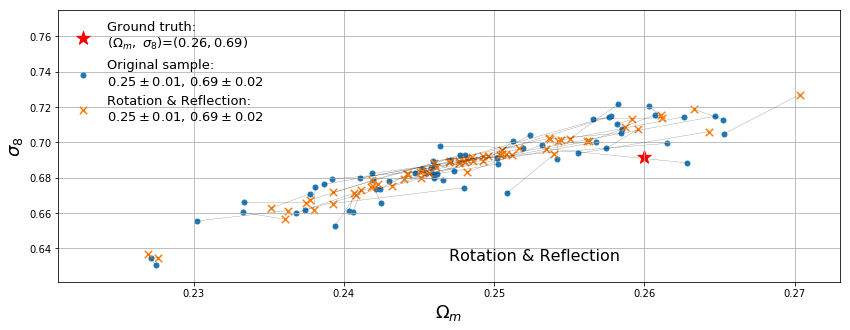

In [211]:
fig, ax1 = subplots(figsize=(14,5))
for ax in [ax1, ax0s[4]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')

   
    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Original sample:\n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=25, )
    #ax.scatter(rlts3[:,0,0], rlts3[:,0,1], label =r'Data Enhancement: $(\Omega_m,\ \sigma_8)$ = '+\
    #           mean_erbar_str(rlts3[:,0,0])+', '+mean_erbar_str(rlts3[:,0,1])+')', s=55, marker='+')

    ax.scatter(rlts2_avg[:,0,0], rlts2_avg[:,0,1], label ='Rotation & Reflection:\n'+\
               mean_erbar_str(rlts2_avg[:,0,0])+', '+mean_erbar_str(rlts2_avg[:,0,1]), s=55, marker='x')

    for row in range(len(rlts[:,0,0])):
        ax.plot([rlts[row,0,0],rlts2_avg[row,0,0]], [rlts[row,0,1],rlts2_avg[row,0,1]], c='k', lw=0.15)

    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    ax.set_xlim(0.221, 0.273); ax.set_ylim(0.621, 0.775)
    #ax.scatter([om], [sig8], s=1050, marker='*', label='Ground truth: $(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$', c='r')
    ax.grid()
    ax.text(0.5, 0.08, 'Rotation & Reflection', transform=ax.transAxes, fontsize=16)
    ax.legend(fontsize=13, loc='upper left', frameon=False)
    #fig
    fig.savefig('../draft/test_de.eps', format='eps')

##### Different resolution

In [212]:
nowfile = '/media/xiaodongli/0B9ADFB4341AD2BD/BigMD_diff_resoluation/128grid//128grid03000c.b'
file55 = '/media/xiaodongli/0B9ADFB4341AD2BD/BigMD_diff_resoluation/55grid//55grid03000c.b'
file102 = '/media/xiaodongli/0B9ADFB4341AD2BD/BigMD_diff_resoluation/102grid//102grid03000c.b'
file115 = '/media/xiaodongli/0B9ADFB4341AD2BD/BigMD_diff_resoluation/115grid//115grid03000c.b'
file141 = '/media/xiaodongli/0B9ADFB4341AD2BD/BigMD_diff_resoluation/141grid//141grid03000c.b'


rlts, rlts55, rlts102, rlts102, rlts115, rlts141 = [],[],[],[],[],[]

model = keras.models.load_model('sgd/300.save')

for nowdata in subcubes(load_grid(nowfile)):
    rlts.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
#for nowdata in subcubes(load_grid(file55)):
#    rlts55.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(load_grid(file102)):
    rlts102.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(load_grid(file115)):
    rlts115.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
for nowdata in subcubes(load_grid(file141)):
    rlts141.append(model.predict(nowdata.reshape(-1,32,32,32,1)))
rlts, rlts55, rlts102, rlts102, rlts115, rlts141 =np.array(rlts), np.array(rlts55), \
    np.array(rlts102), np.array(rlts102), np.array(rlts115), np.array(rlts141)    

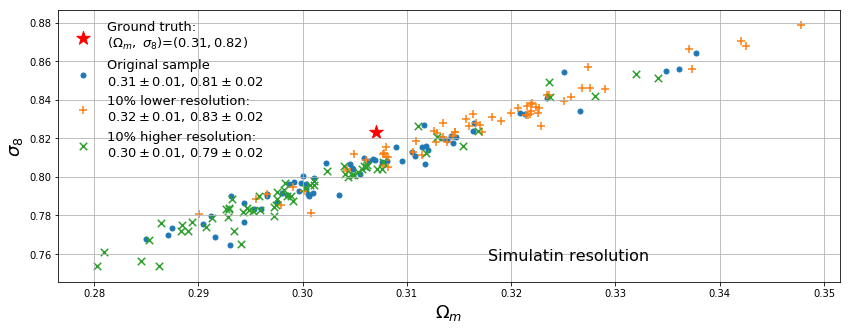

In [213]:
fig, ax1 = subplots(figsize=(14,5))
om, sig8 = 0.307, 0.823
for ax in [ax1, ax0s[5]]:
    ax.scatter([om], [sig8], s=200, c='r', marker='*', label='Ground truth: \n$(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')

    ax.scatter(rlts[:,0,0], rlts[:,0,1], label='Original sample\n'+\
               mean_erbar_str(rlts[:,0,0])+', '+mean_erbar_str(rlts[:,0,1]), s=25, )
    ax.scatter(rlts115[:,0,0], rlts115[:,0,1], label ='10% lower resolution:\n'+\
               mean_erbar_str(rlts115[:,0,0])+', '+mean_erbar_str(rlts115[:,0,1]), s=55, marker='+')
    #ax.scatter(rlts102[:,0,0], rlts102[:,0,1], label ='20% lower resolution:\n'+\
    #           mean_erbar_str(rlts102[:,0,0])+', '+mean_erbar_str(rlts102[:,0,1]), s=55, marker='p')
    ax.scatter(rlts141[:,0,0], rlts141[:,0,1], label ='10% higher resolution:\n'+\
               mean_erbar_str(rlts141[:,0,0])+', '+mean_erbar_str(rlts141[:,0,1]), s=55,  marker='x')

    

    ax.set_xlabel(r'$\Omega_m$', fontsize=18)
    ax.set_ylabel(r'$\sigma_8$', fontsize=18)
    #ax.set_xlim(0.221, 0.272); ax.set_ylim(0.621, 0.775)
    #ax.scatter([om], [sig8], s=1050, marker='*', label='Ground truth: $(\Omega_m,\ \sigma_8)$=$(%.2f'%om+', %.2f'%sig8+')$')
    ax.grid()
    ax.text(0.55, 0.08, 'Simulatin resolution', transform=ax.transAxes, fontsize=16)
    ax.legend(fontsize=13, loc='upper left', frameon=False)
    #fig
    #fig.savefig('../draft/test_noise.eps', format='eps')

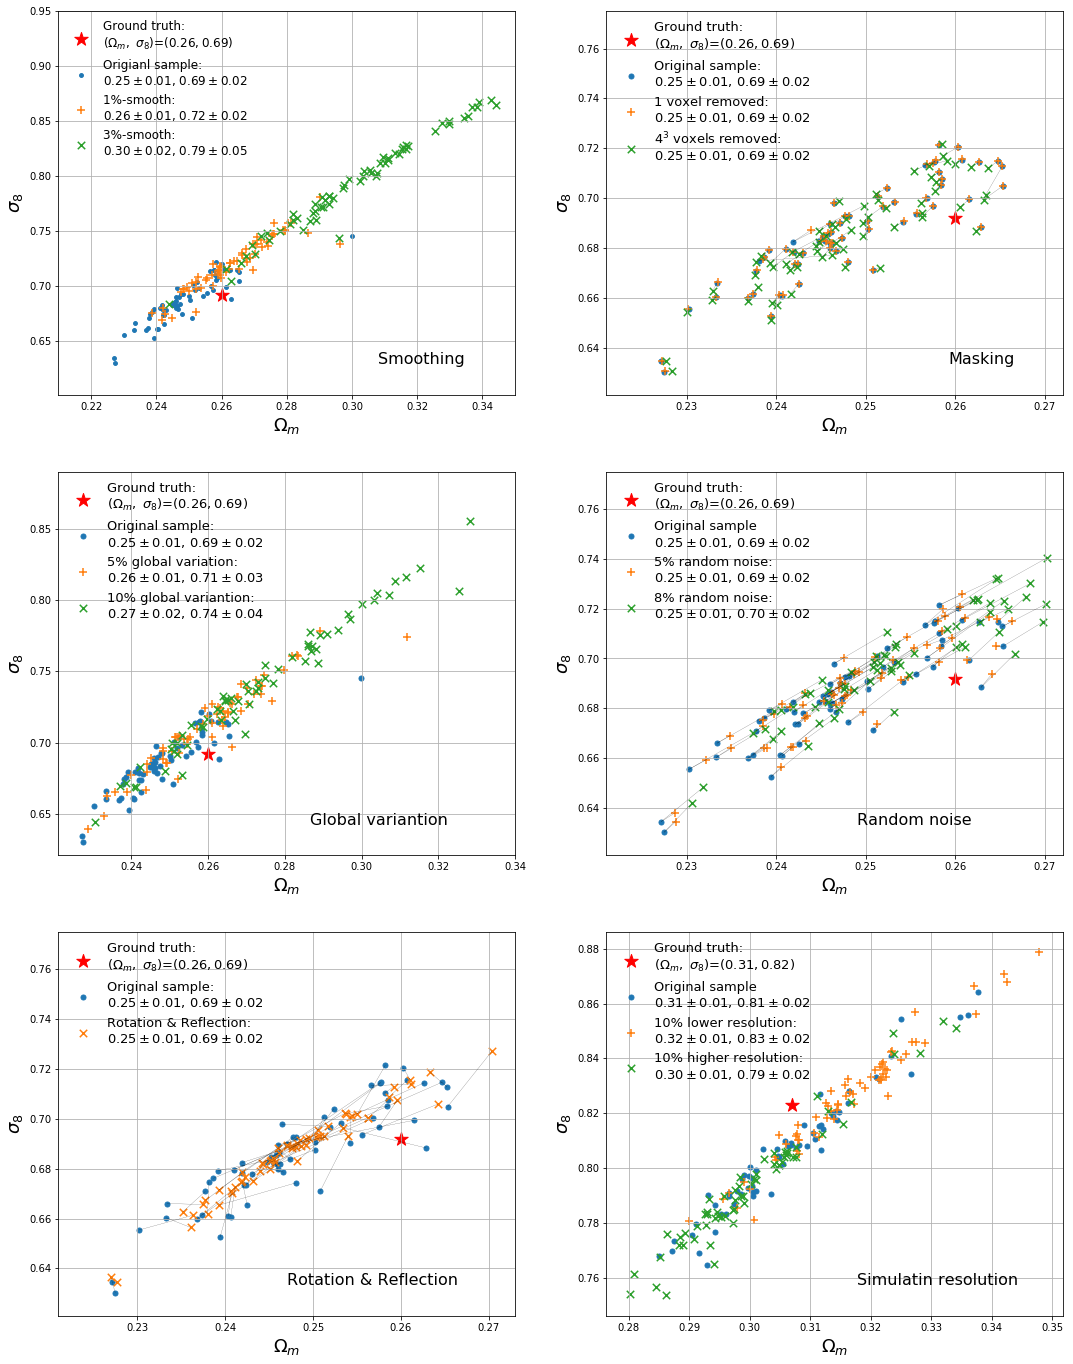

In [214]:
for ax in ax0s:
    ax.grid()
fig0.savefig('../draft/ET.eps', format='eps')    
fig0

# old codes

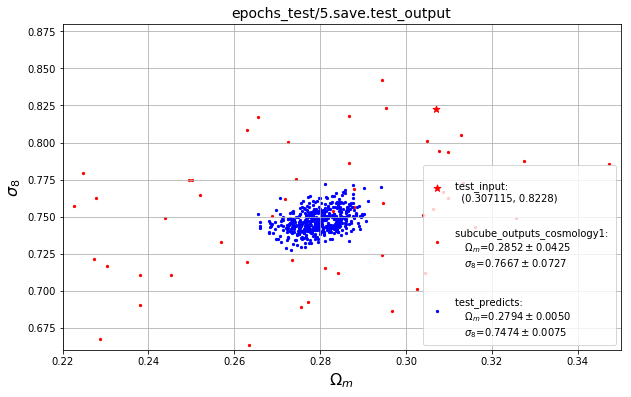

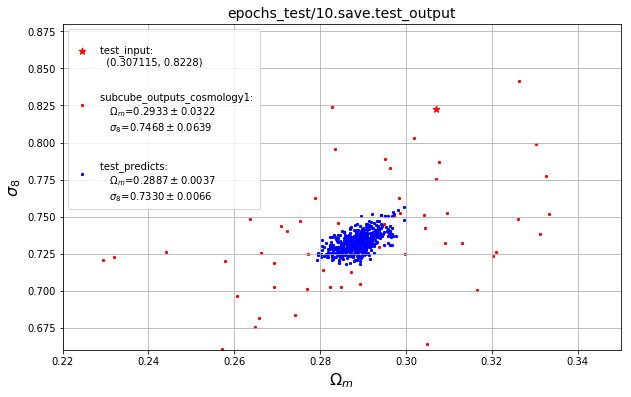

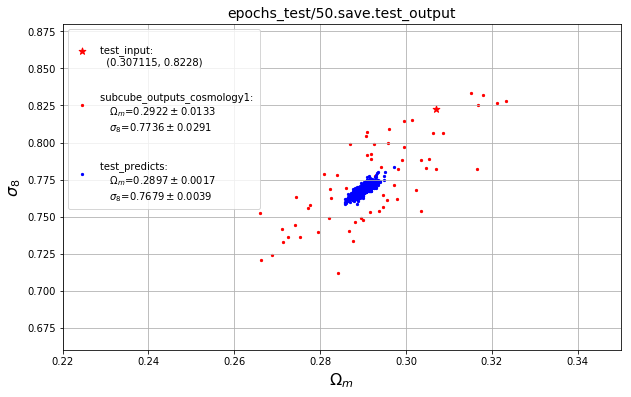

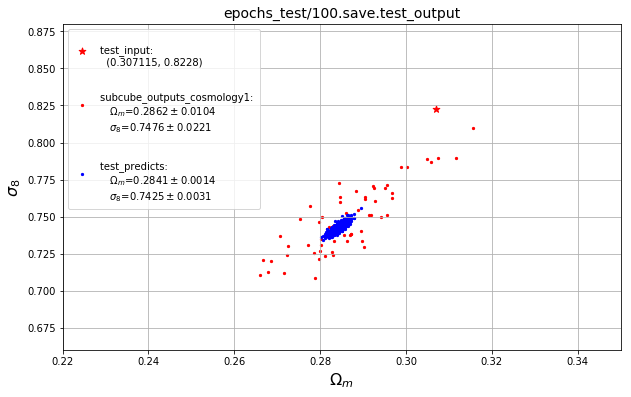

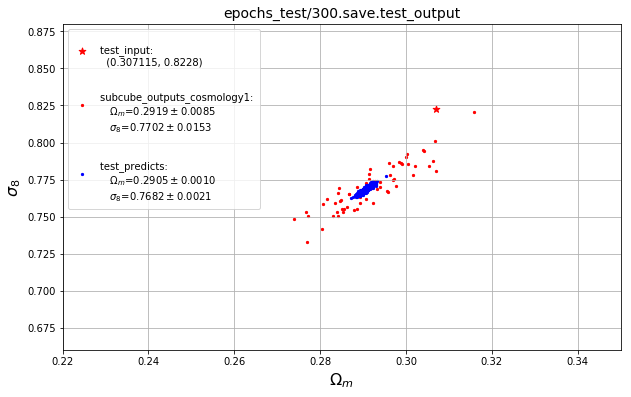

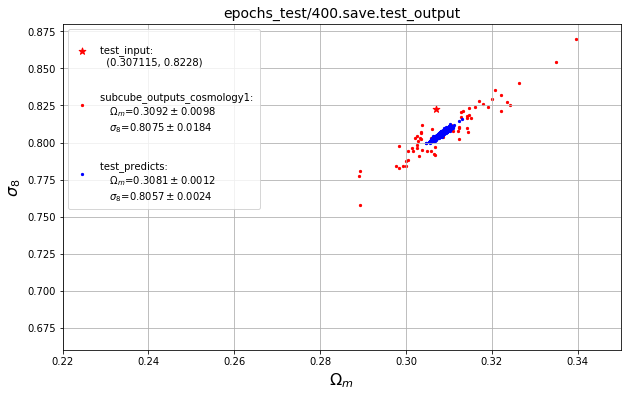

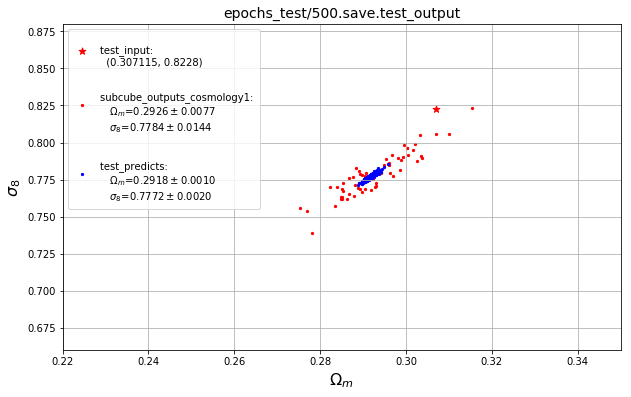

In [112]:
epochs_list = [5, 10, 50, 100, 300, 400, 500]
rlts = []
for epochs in epochs_list:
    file = 'epochs_test/'+str(epochs)+'.save.test_output'
    bigmd_dict, grid_dict = load_testfile(file)
    om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=file); plt.show()
    rlts.append([om, omer, sig8, sig8er])
    #plot_grid_dict(grid_dict, title=file)

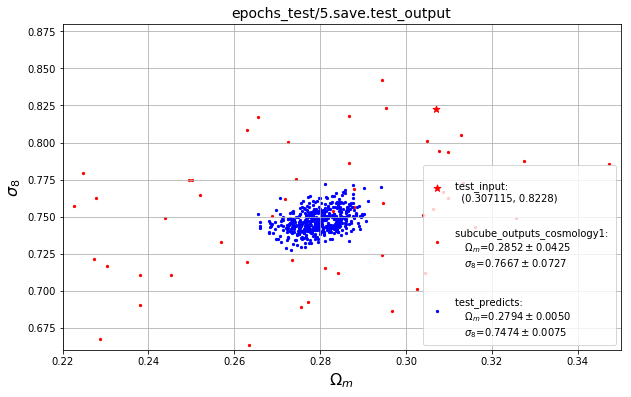

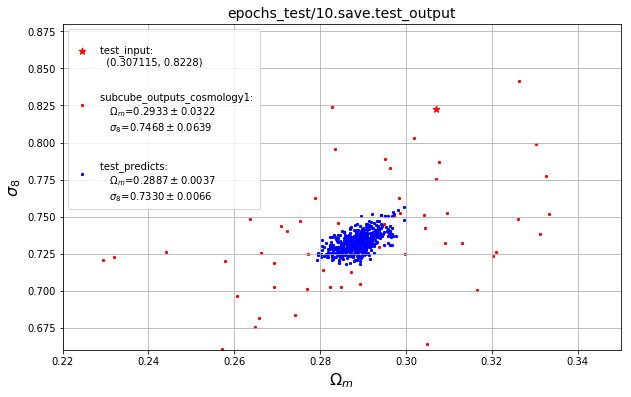

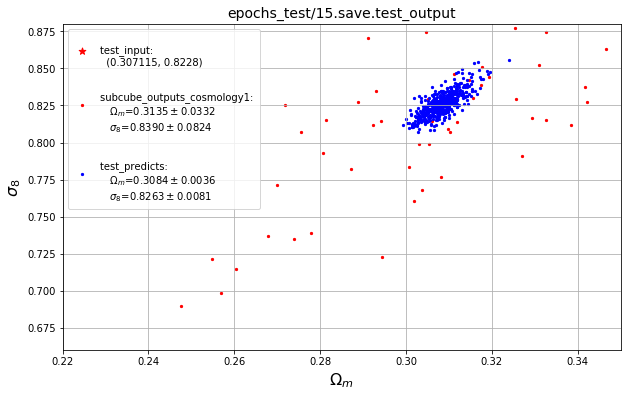

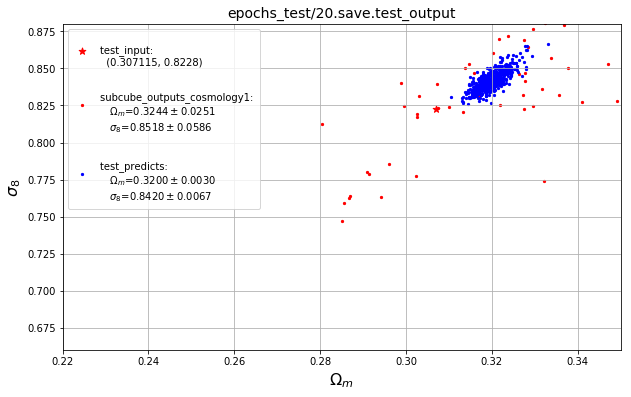

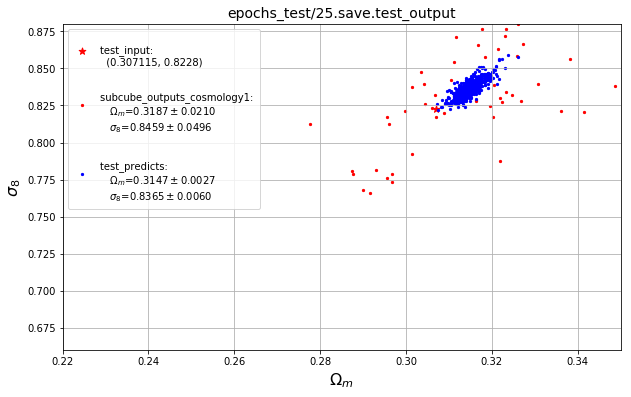

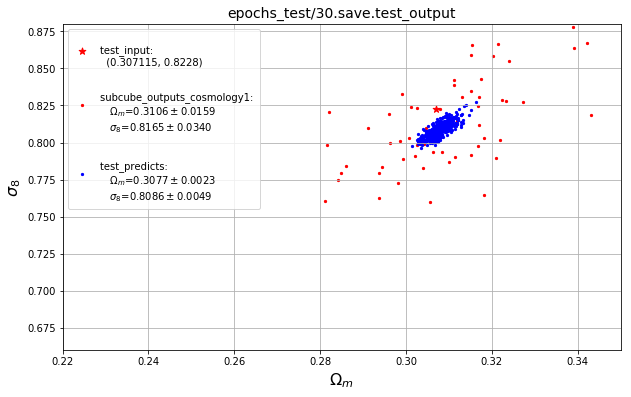

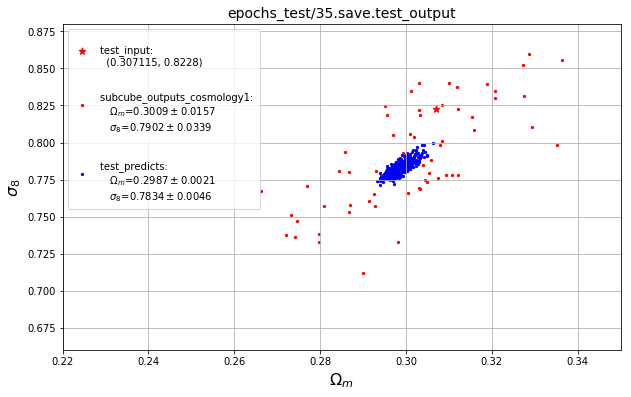

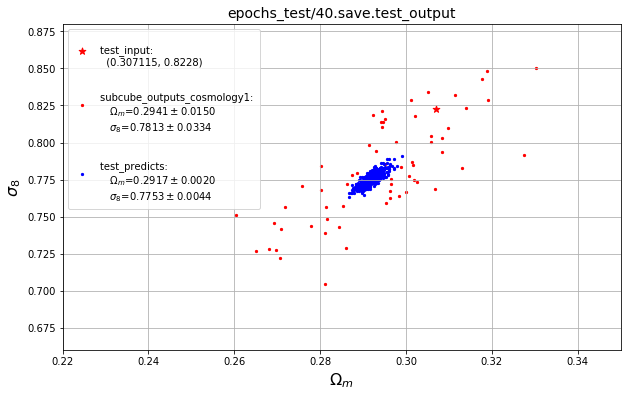

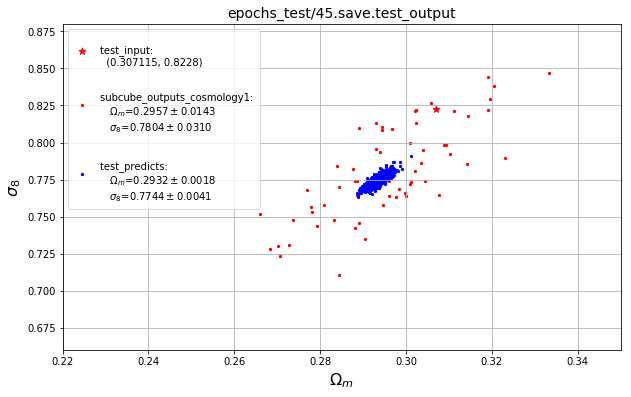

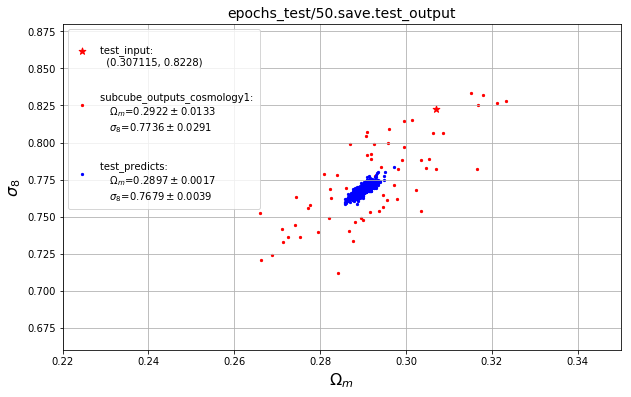

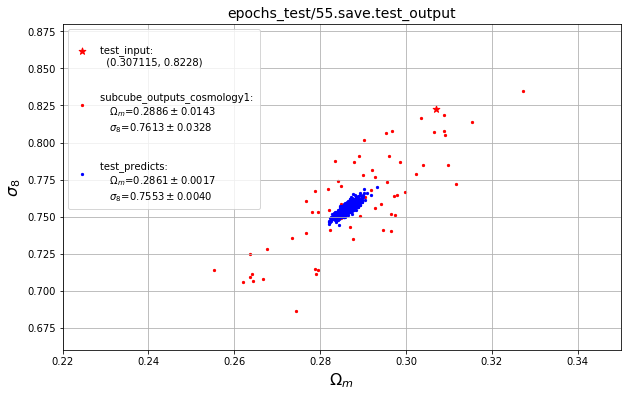

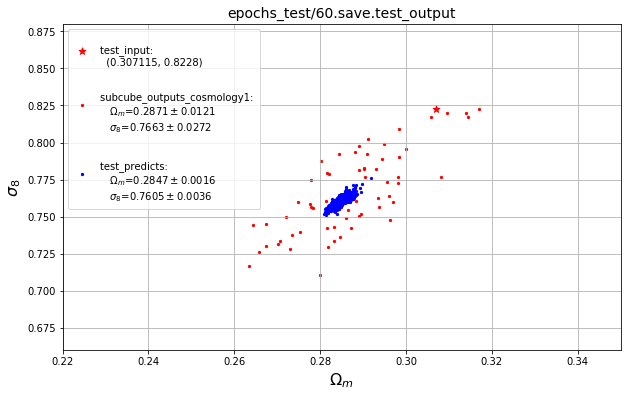

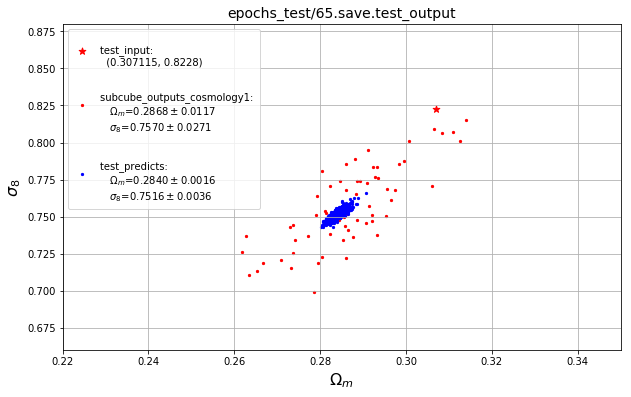

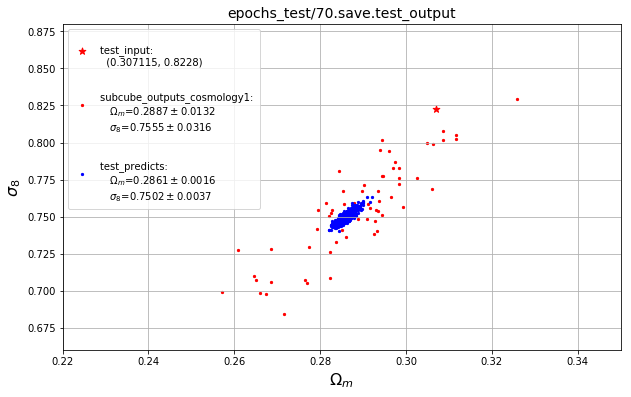

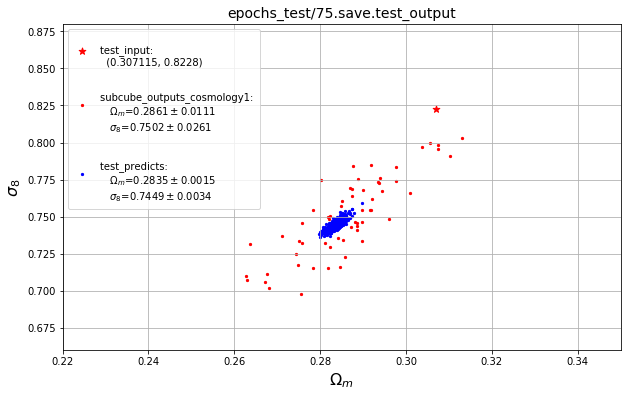

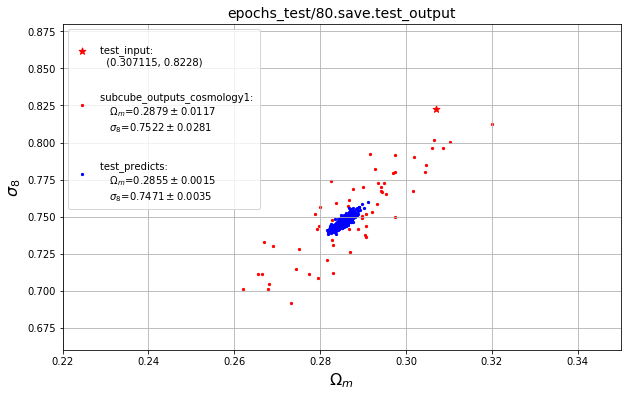

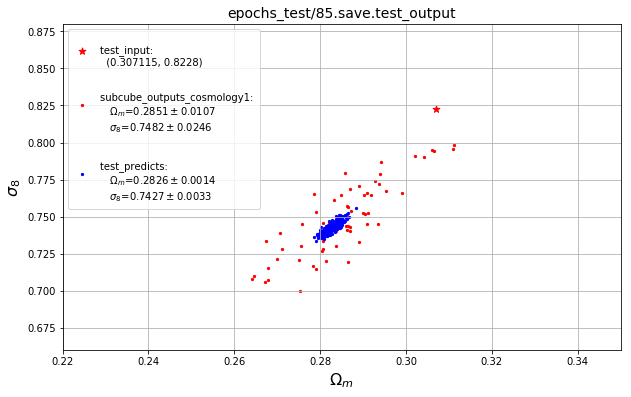

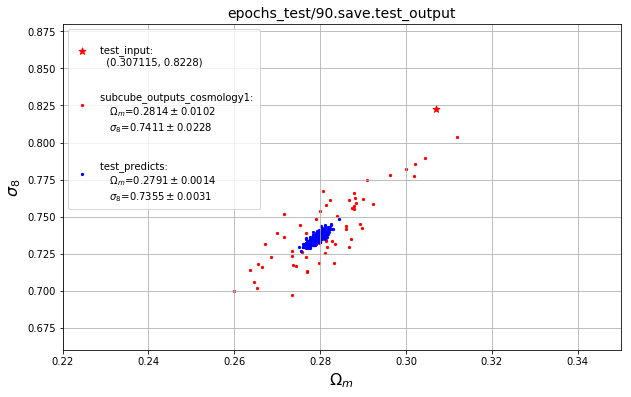

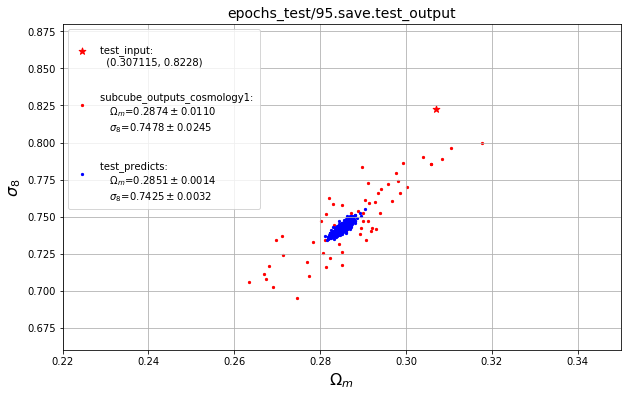

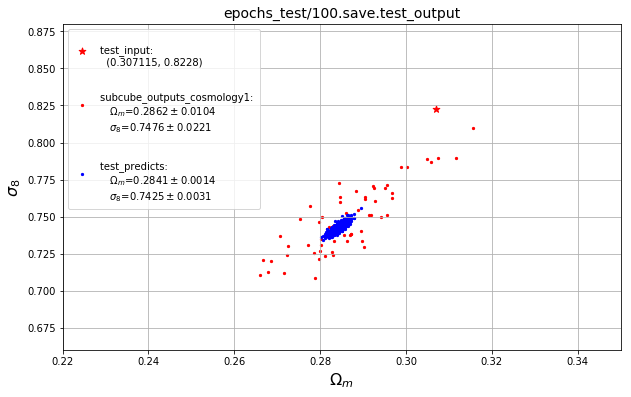

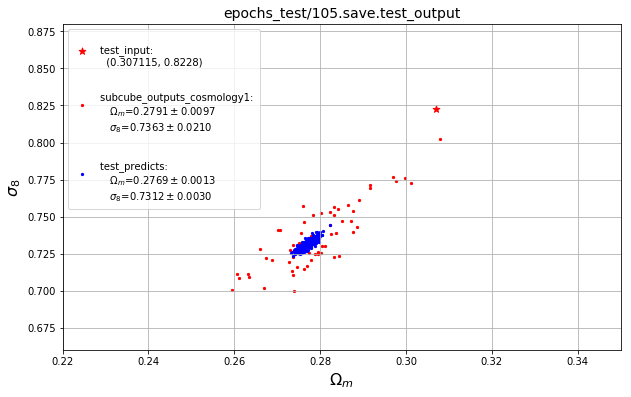

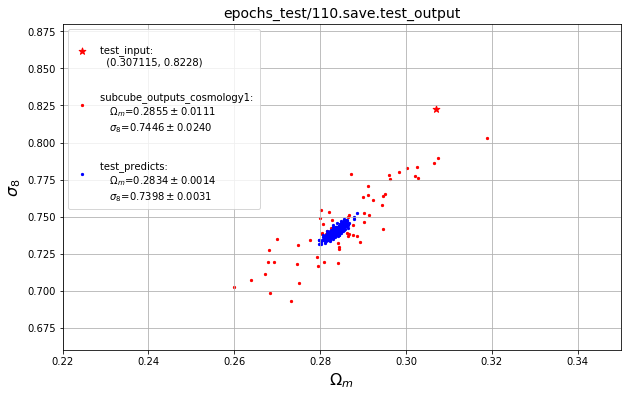

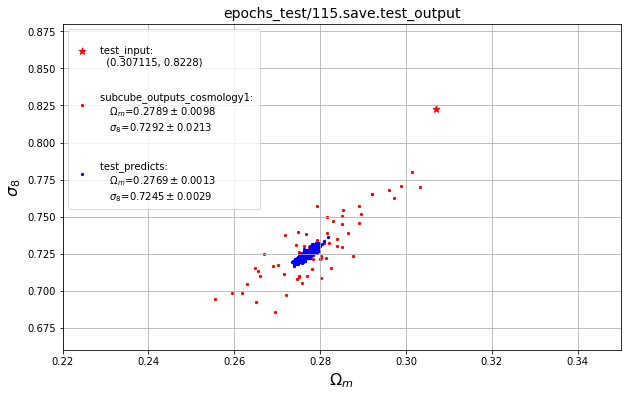

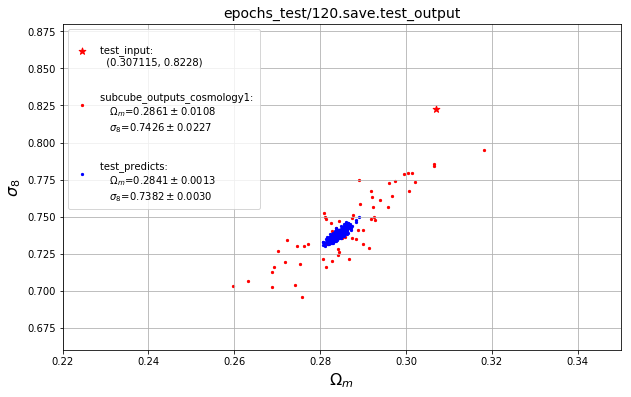

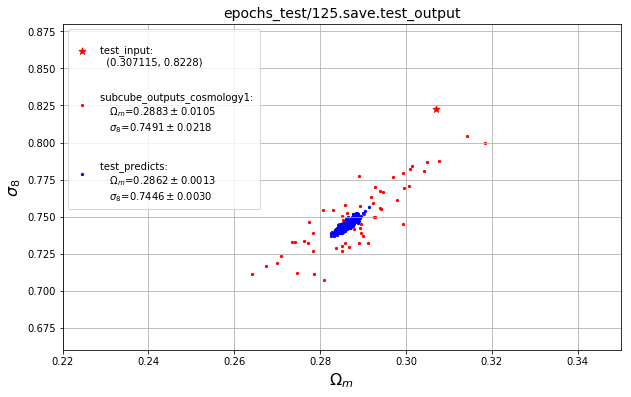

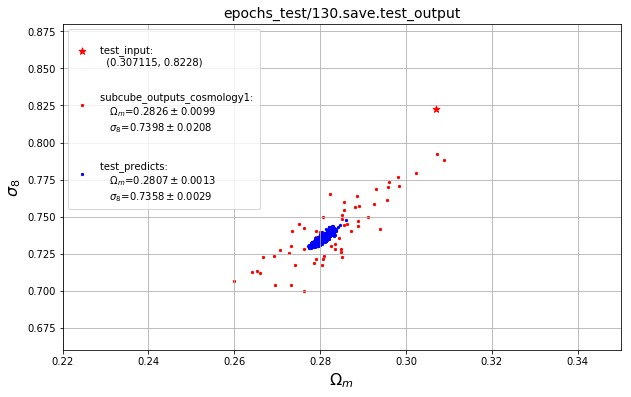

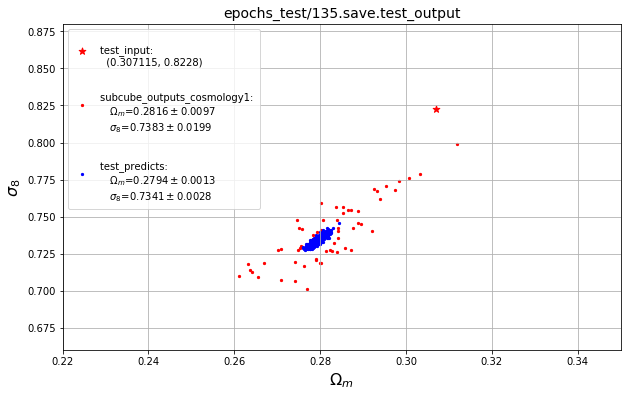

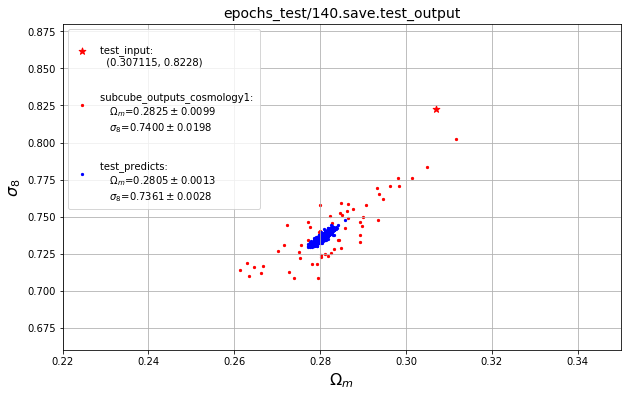

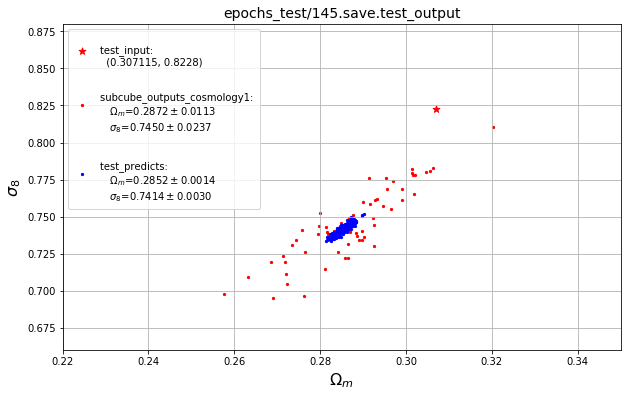

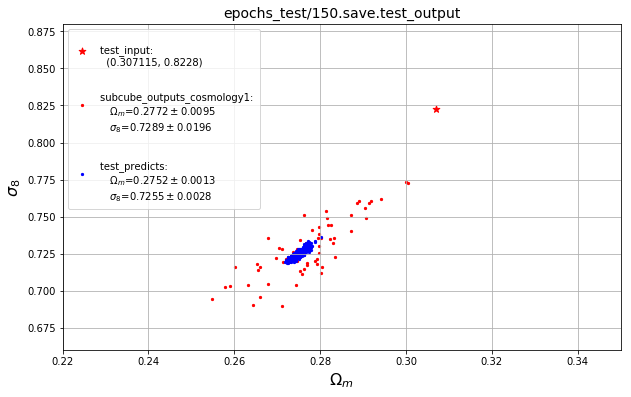

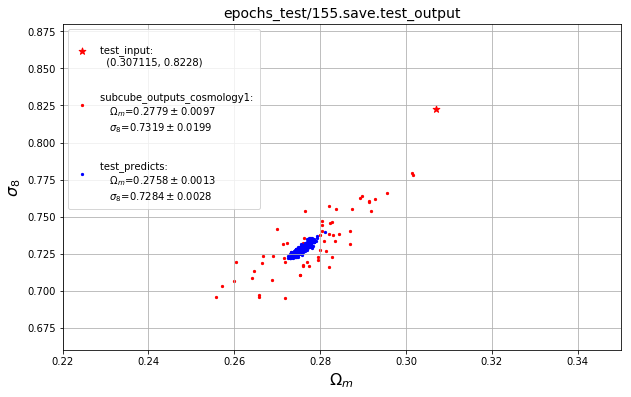

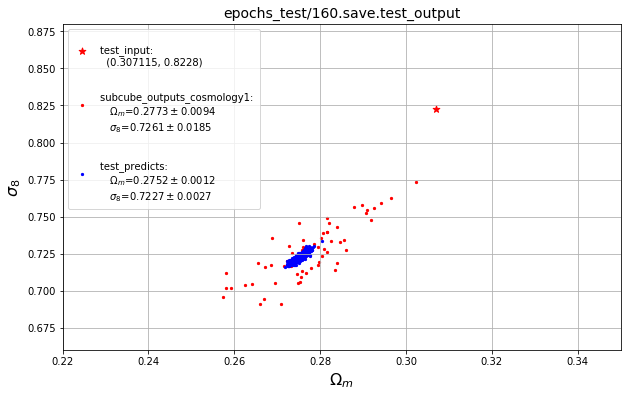

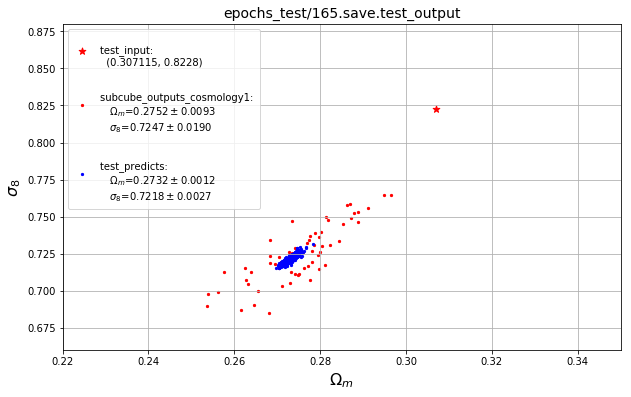

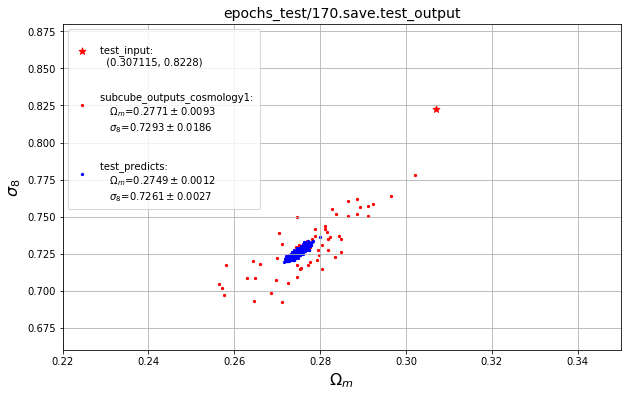

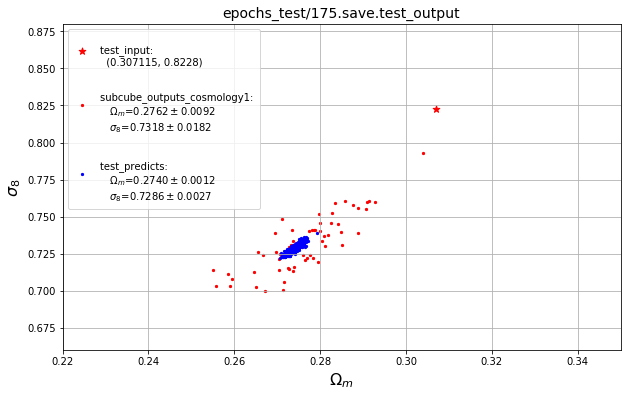

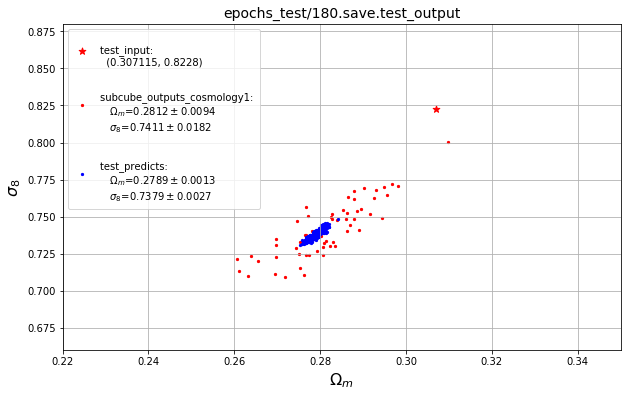

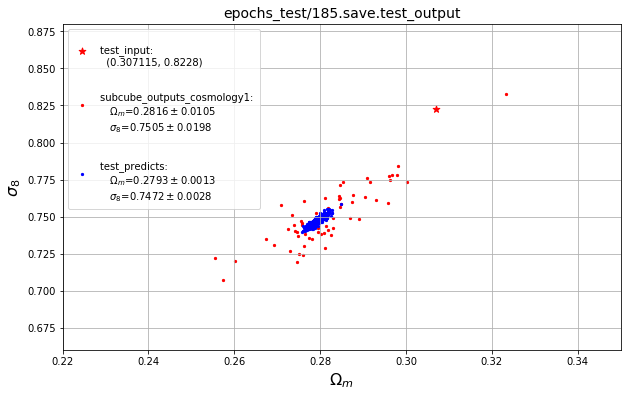

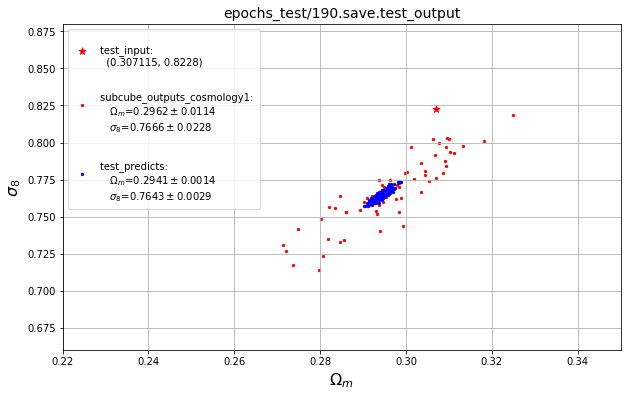

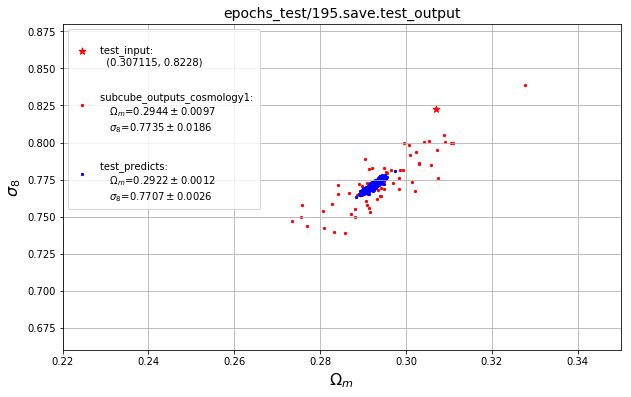

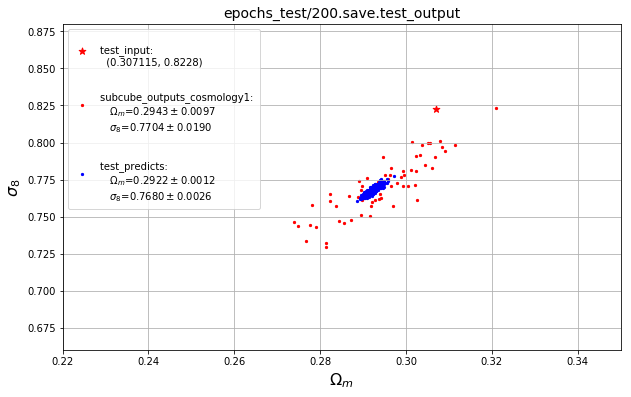

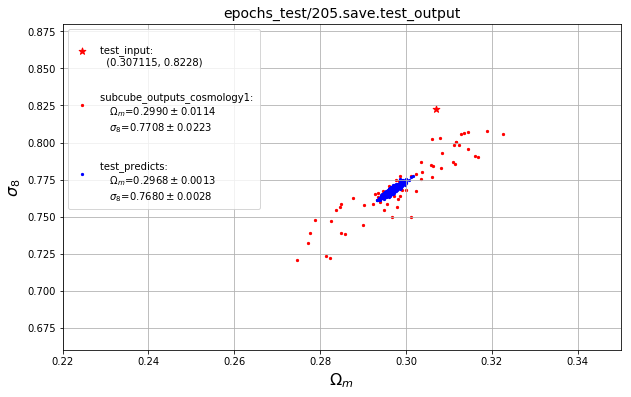

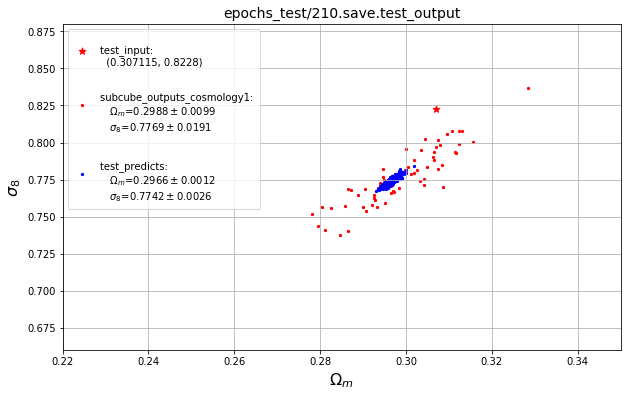

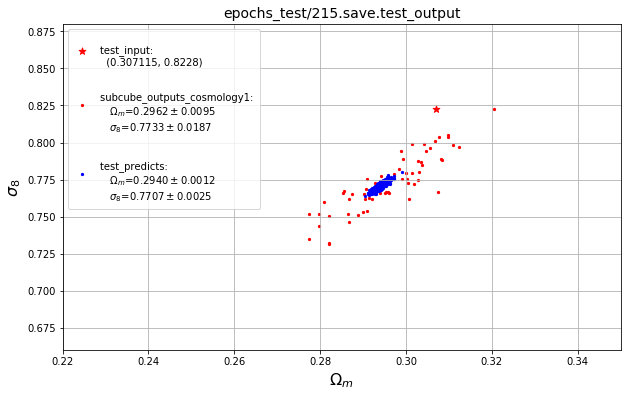

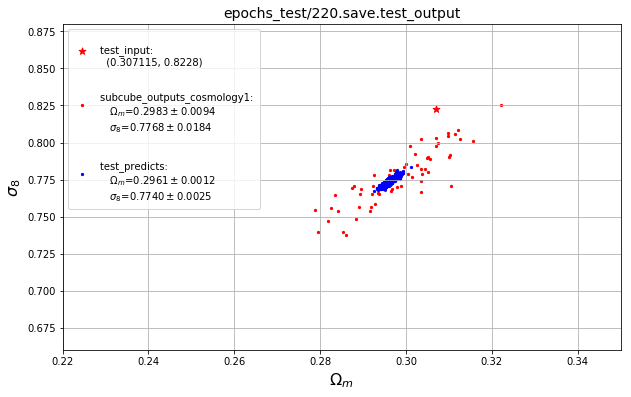

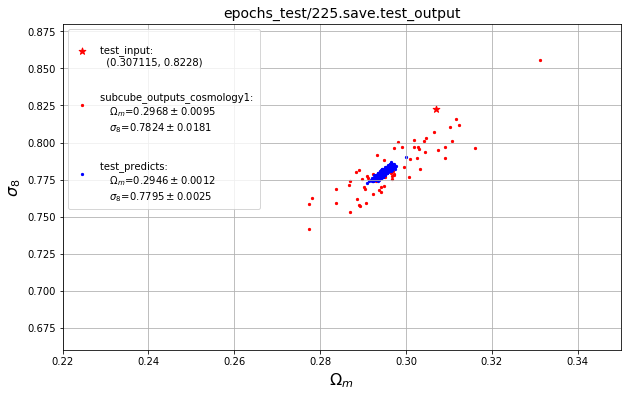

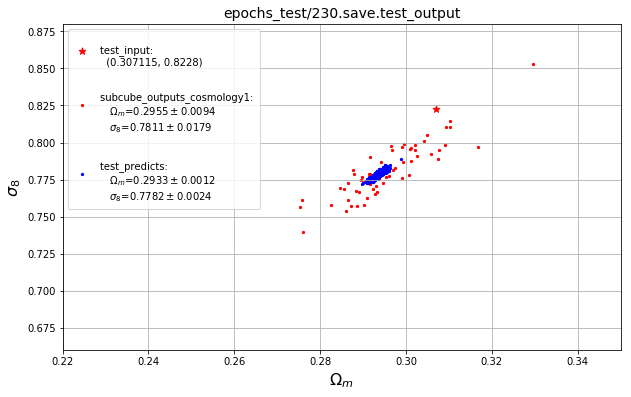

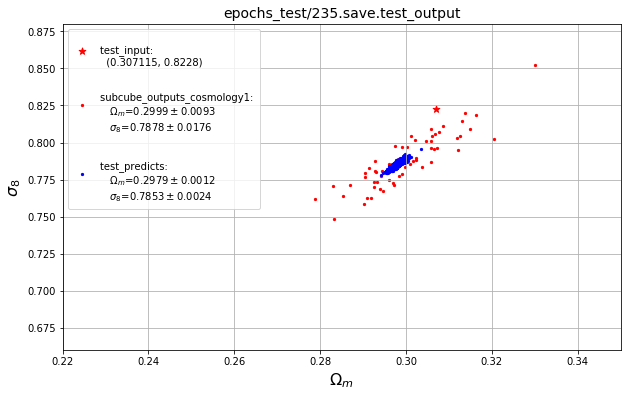

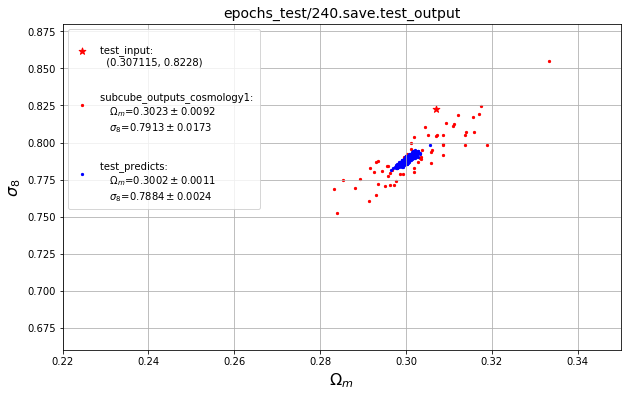

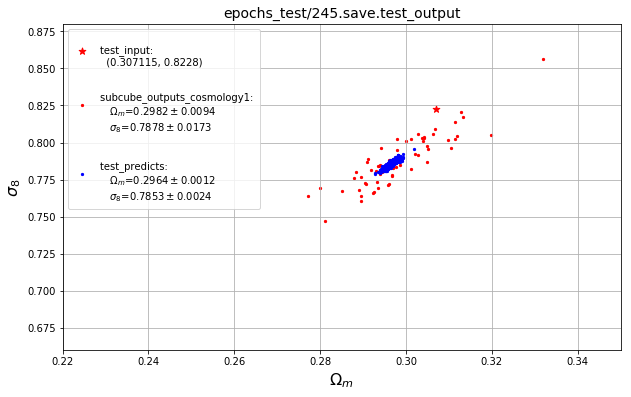

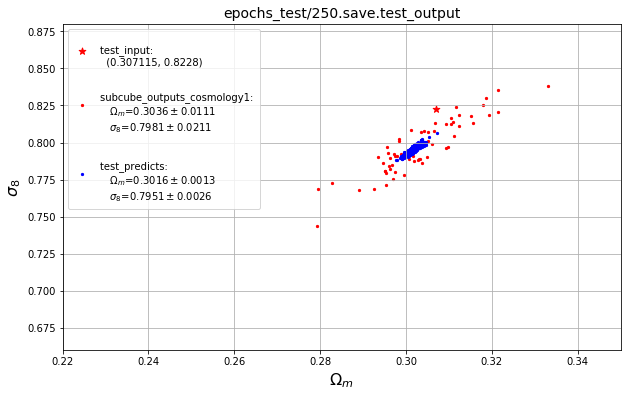

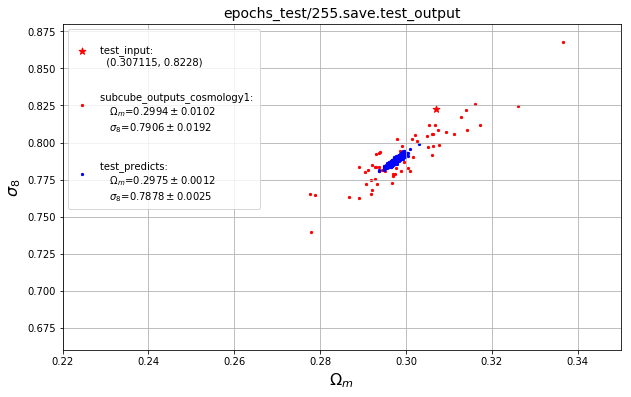

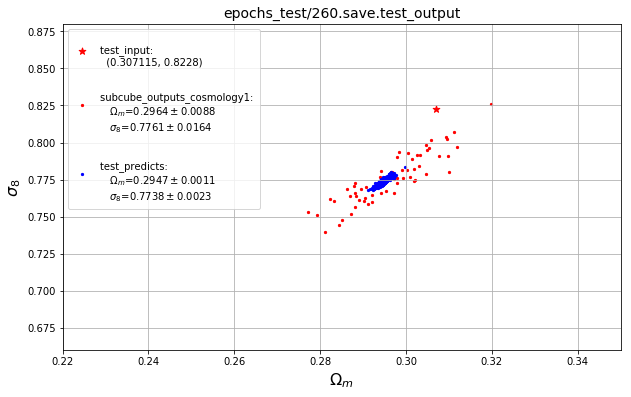

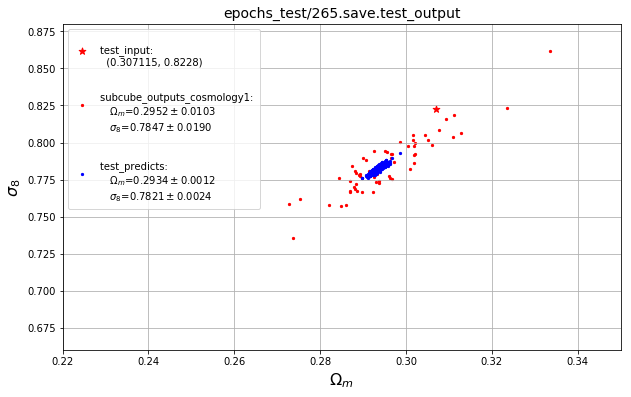

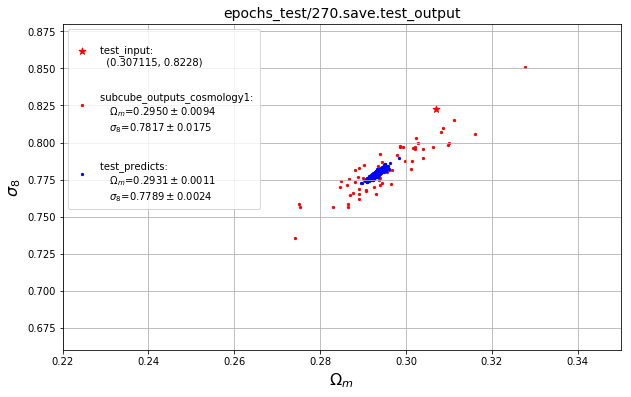

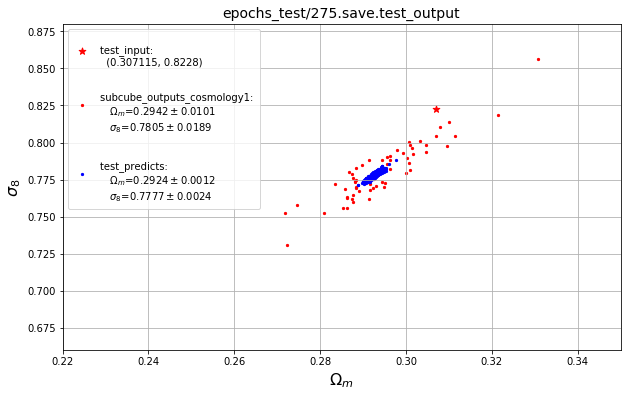

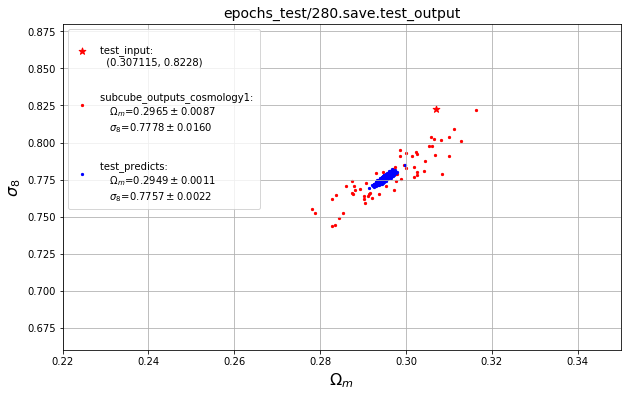

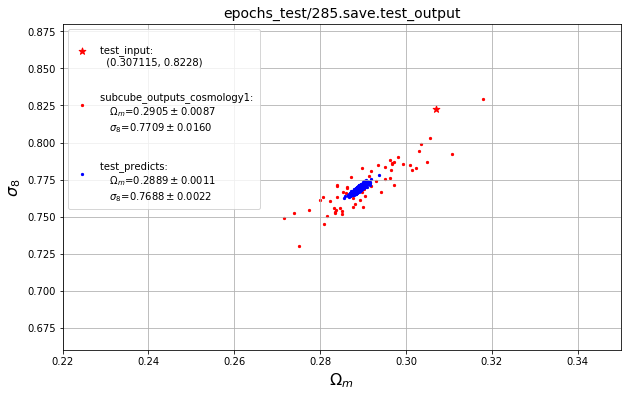

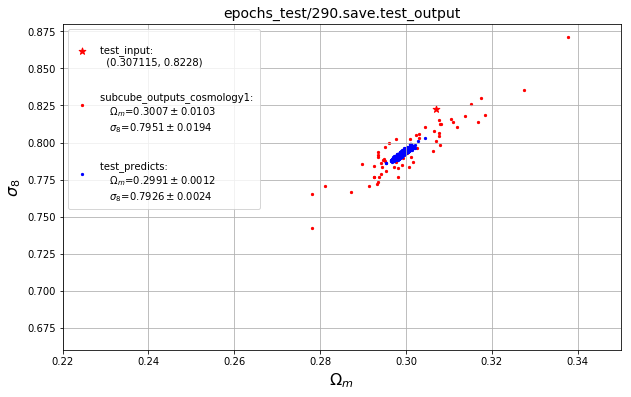

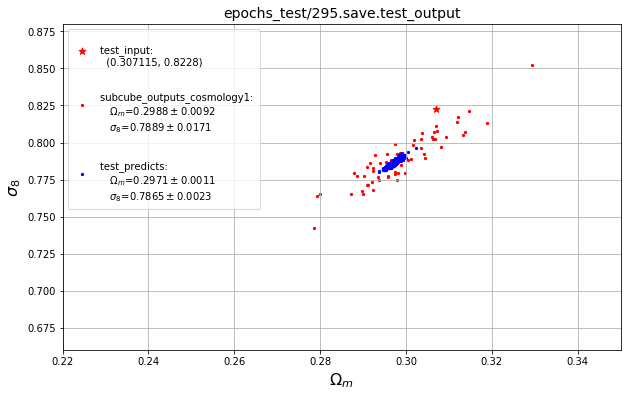

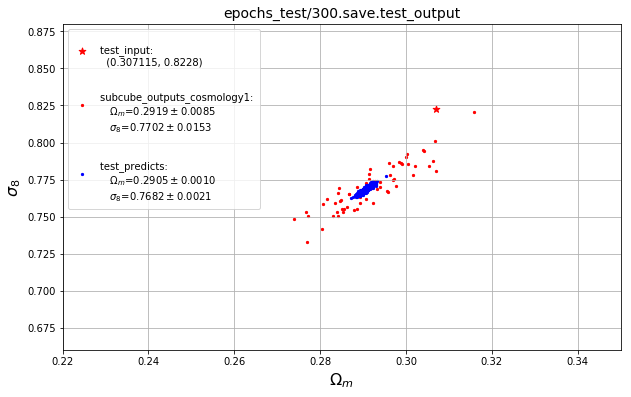

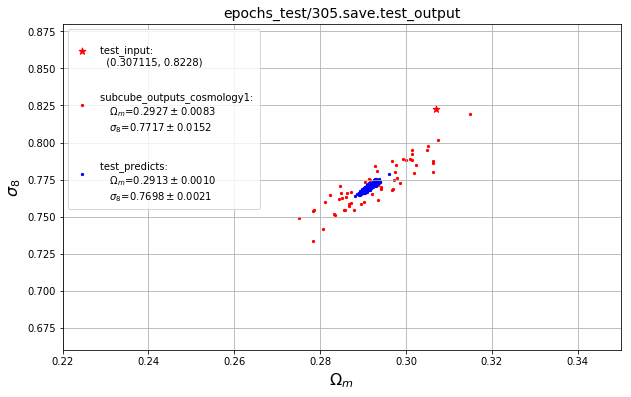

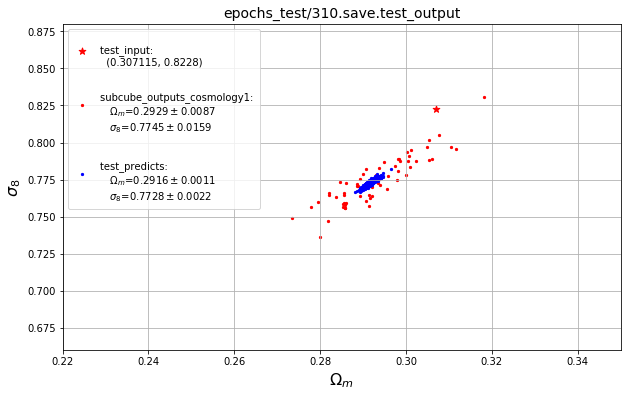

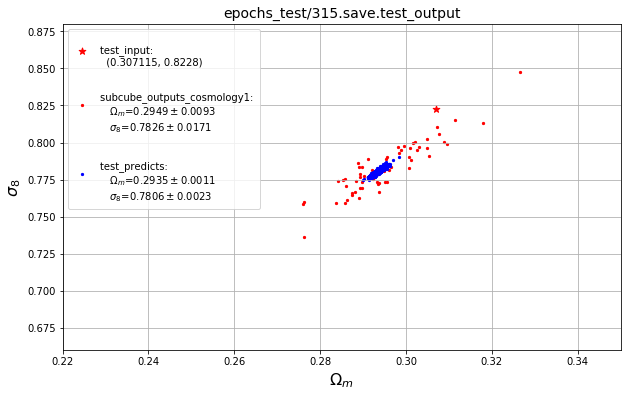

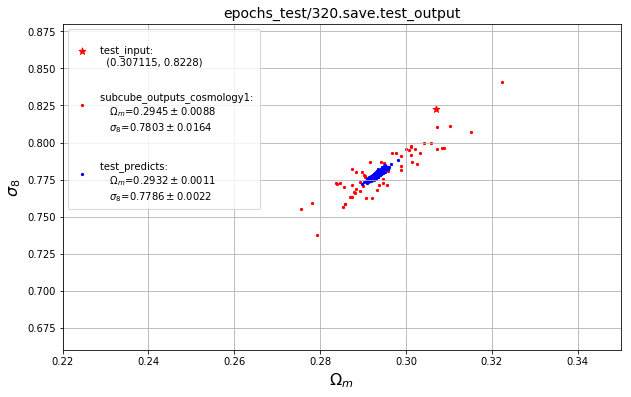

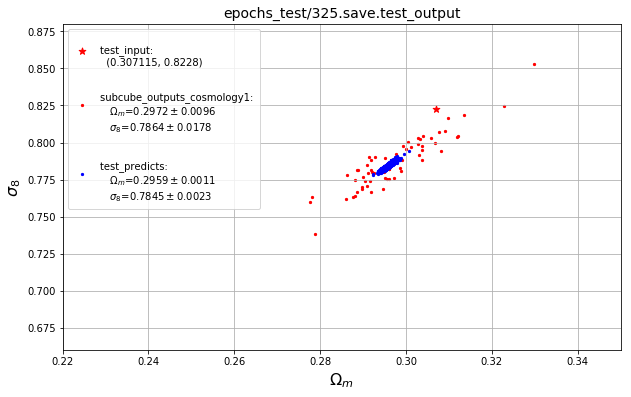

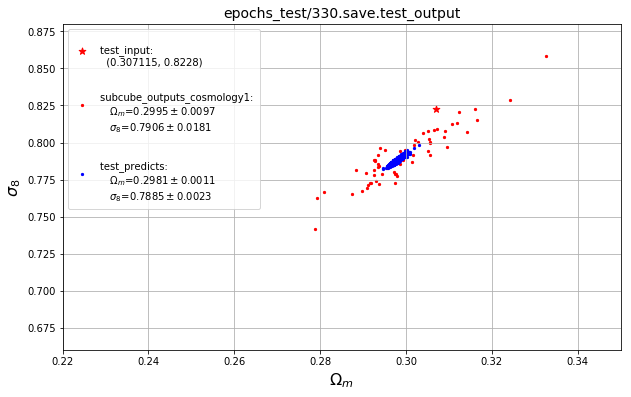

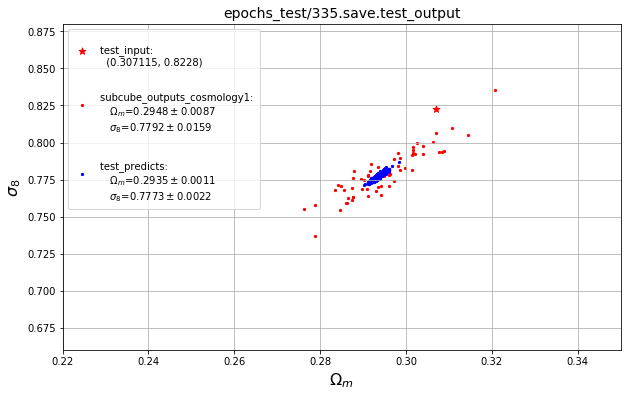

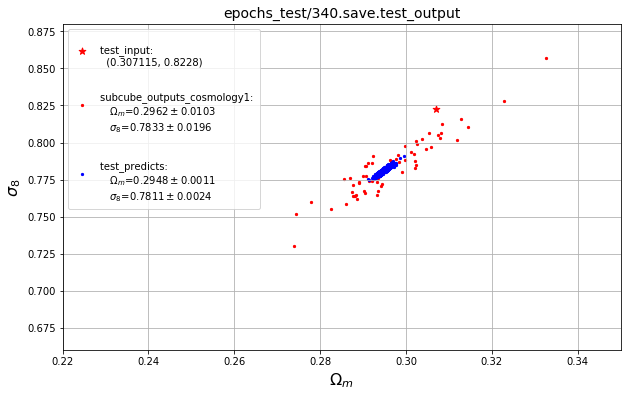

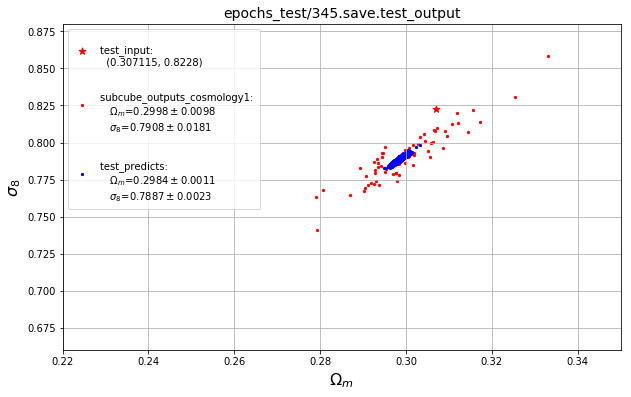

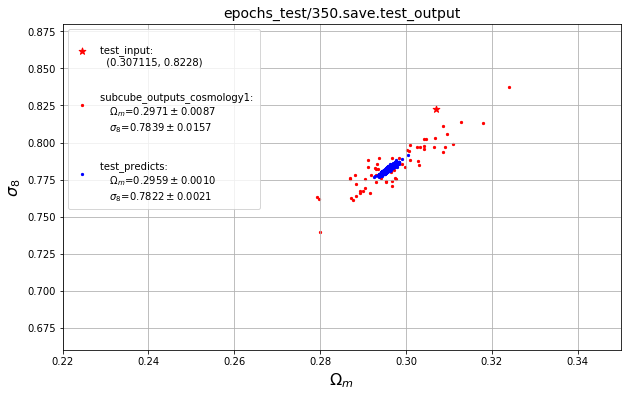

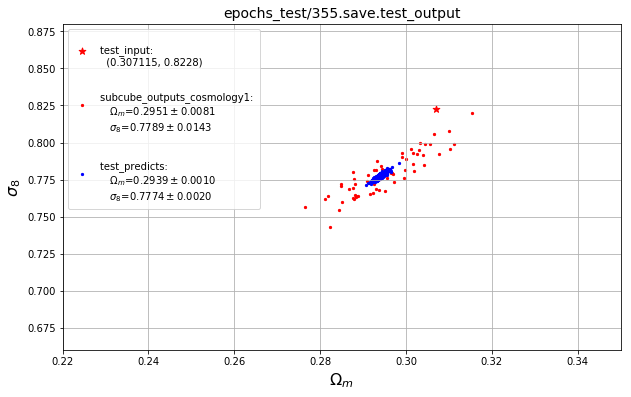

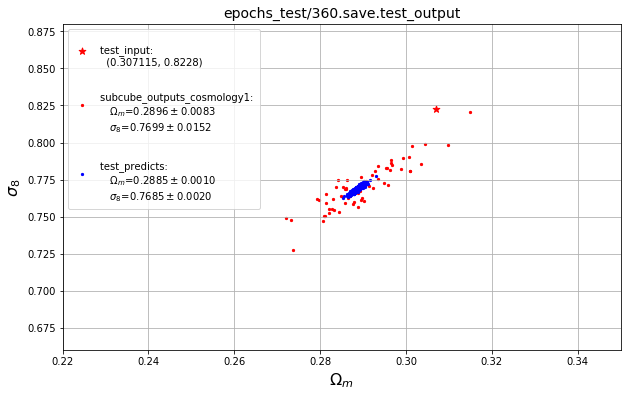

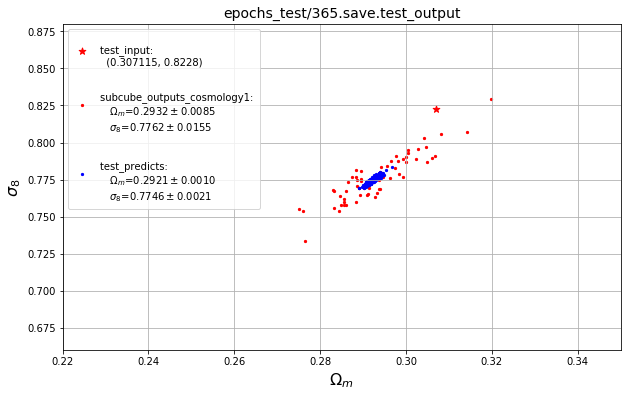

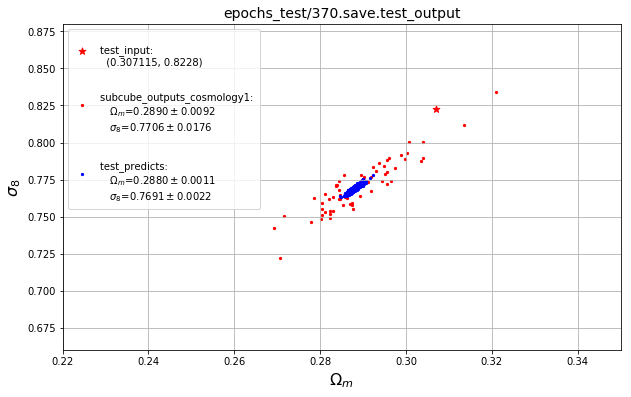

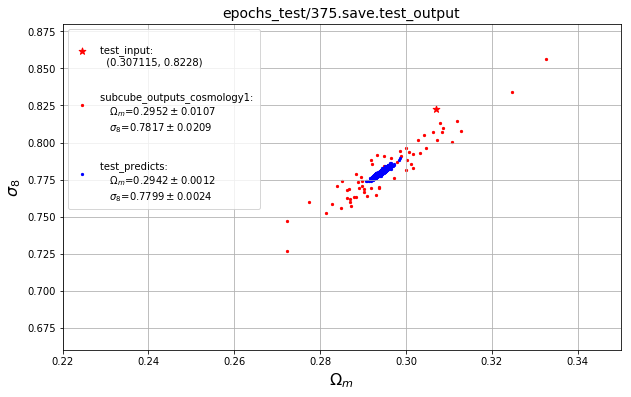

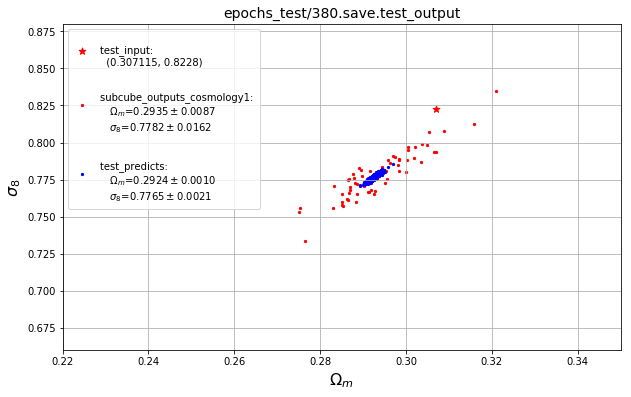

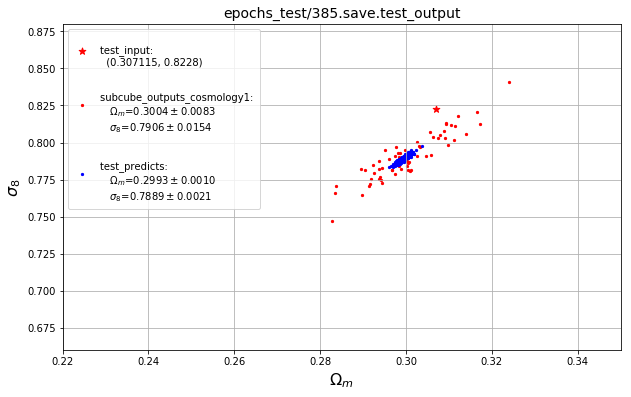

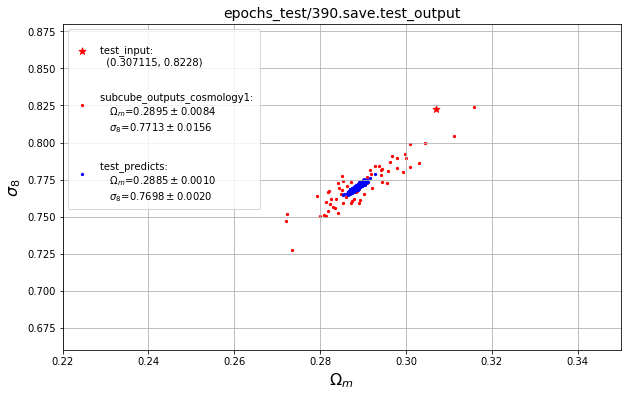

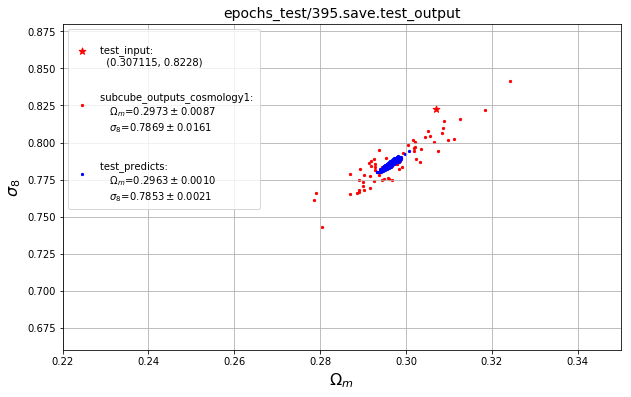

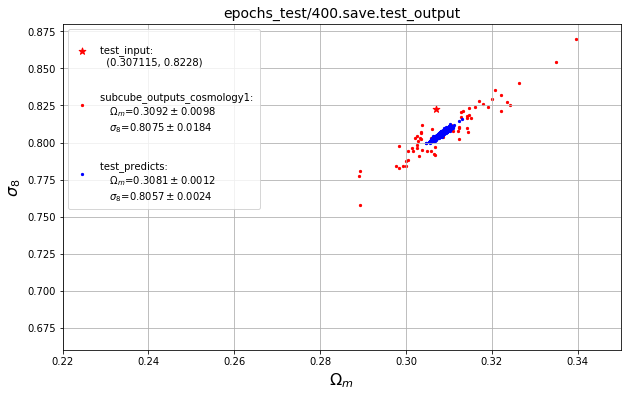

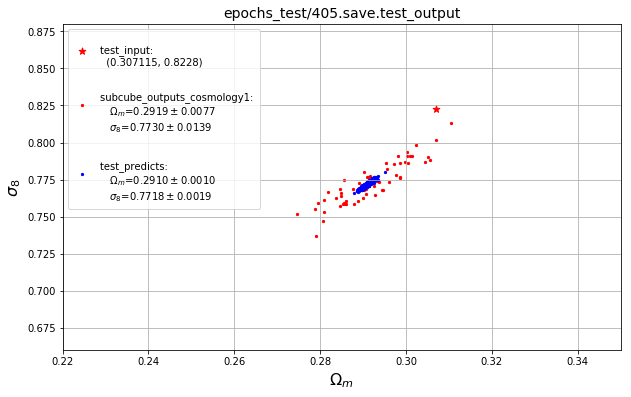

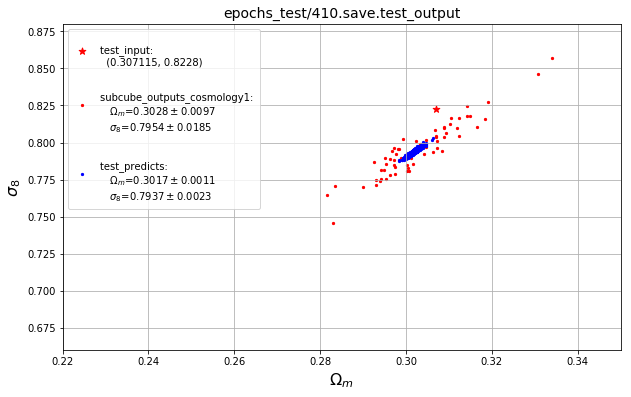

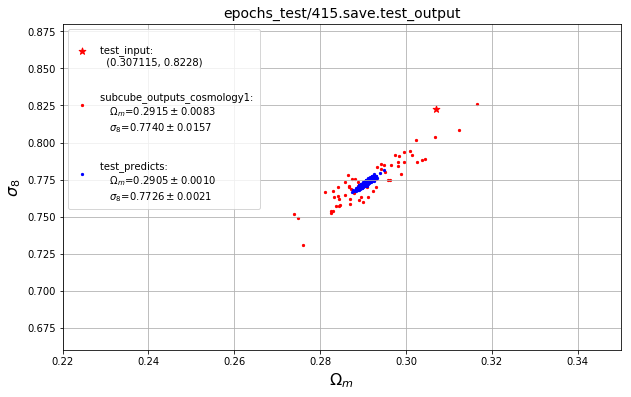

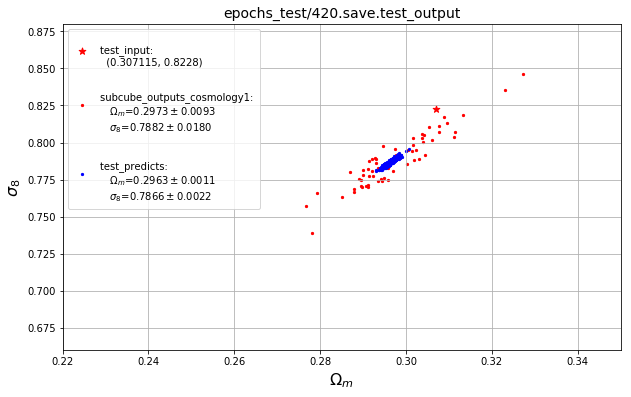

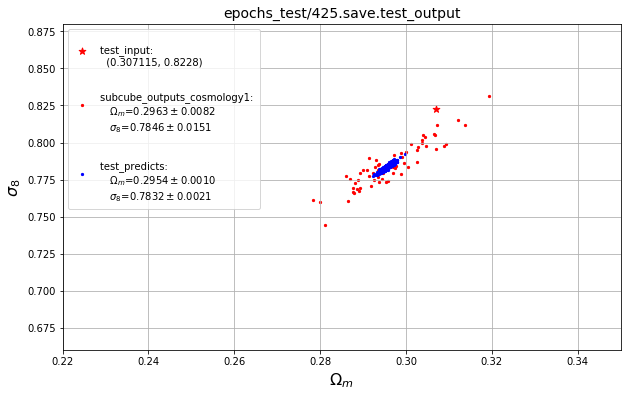

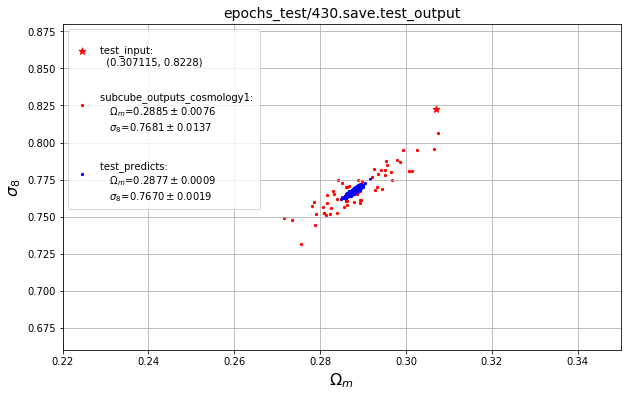

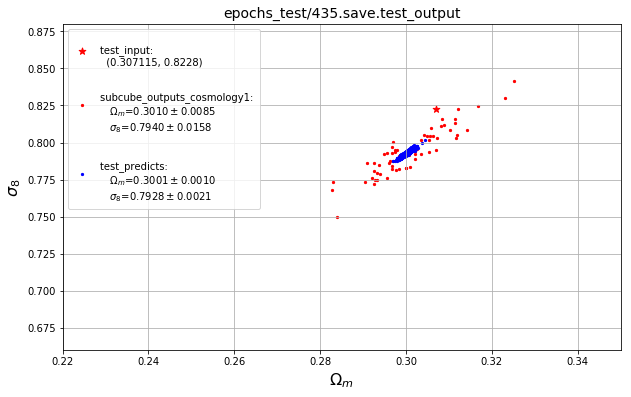

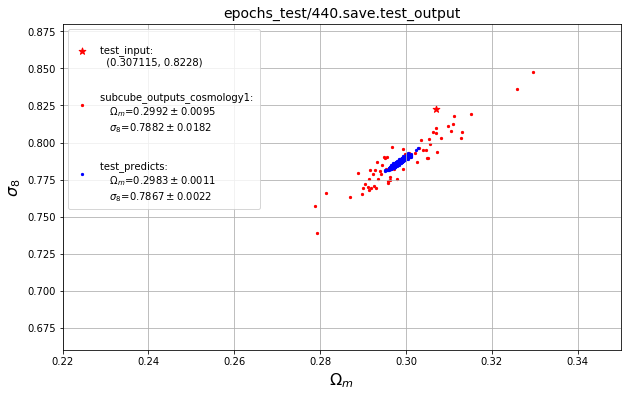

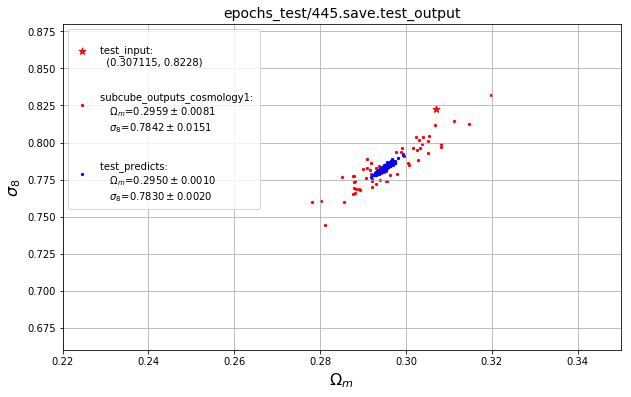

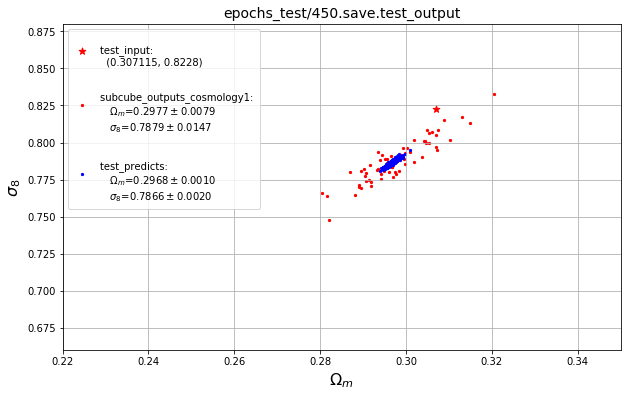

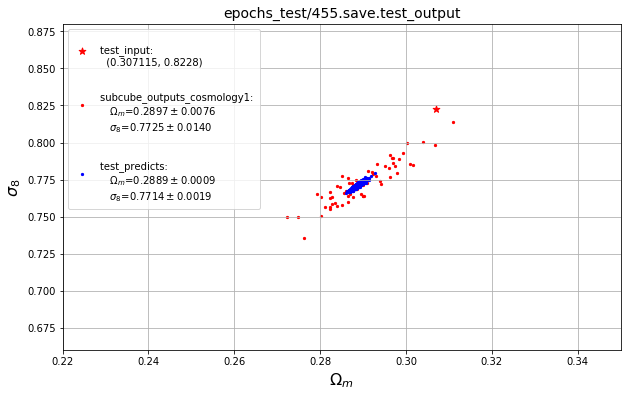

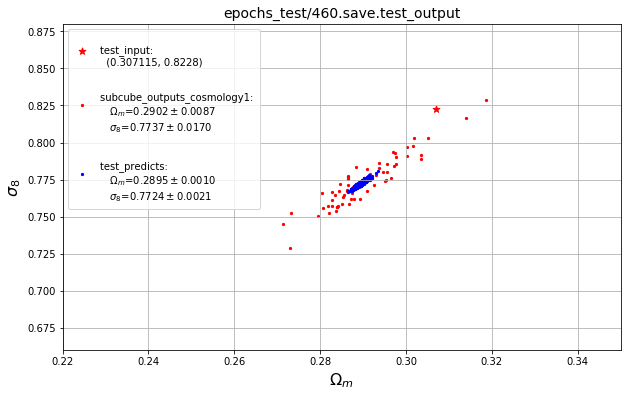

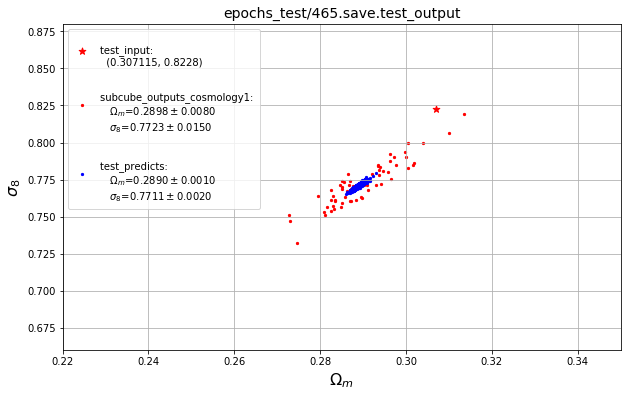

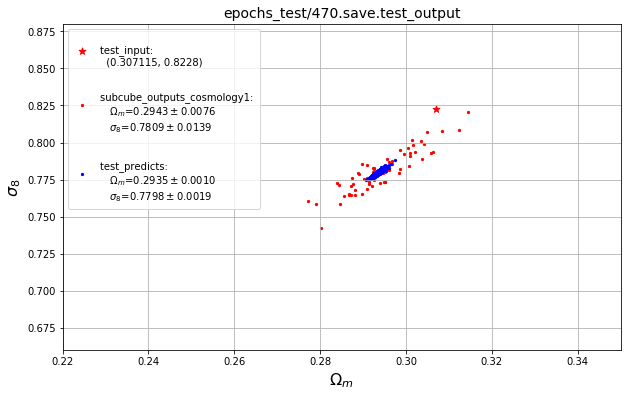

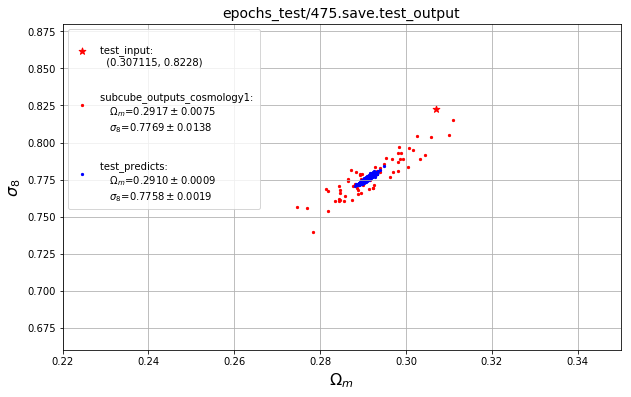

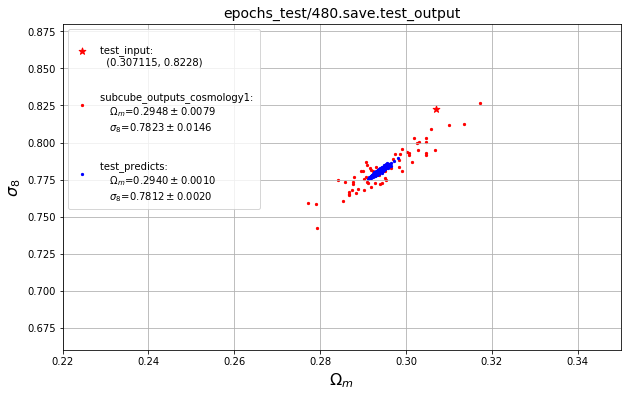

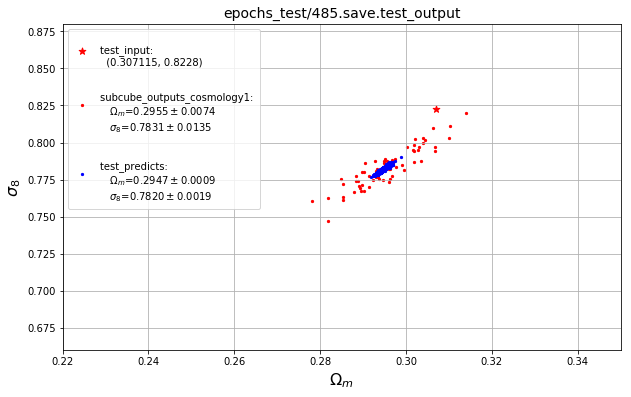

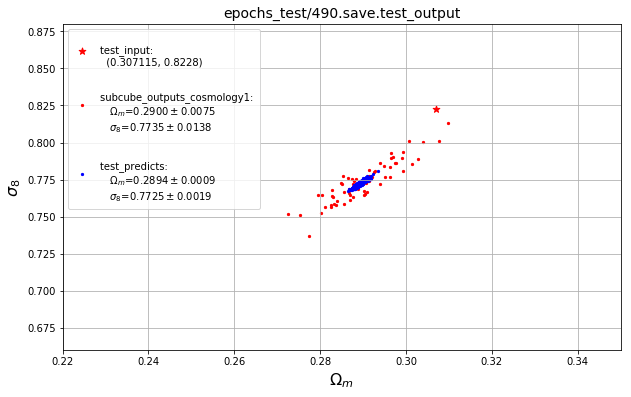

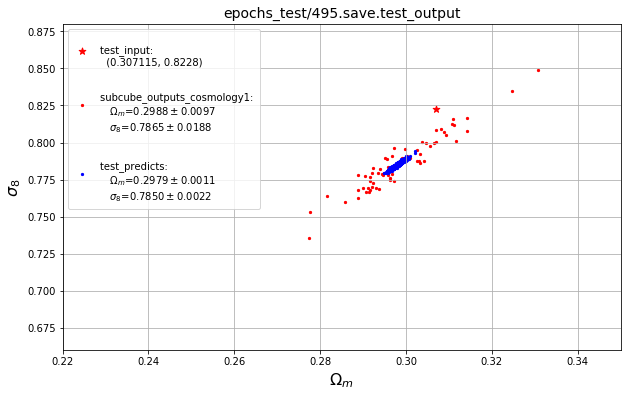

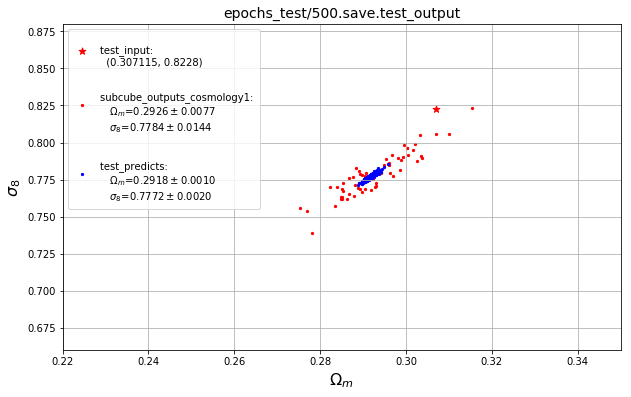

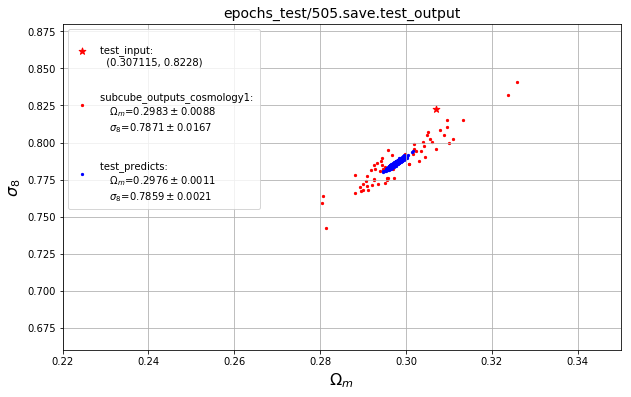

In [3]:
epochs_list = range(5,510,5)
rlts = []
for epochs in epochs_list:
    file = 'epochs_test/'+str(epochs)+'.save.test_output'
    bigmd_dict, grid_dict = load_testfile(file)
    om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=file); plt.show()
    rlts.append([om, omer, sig8, sig8er])

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


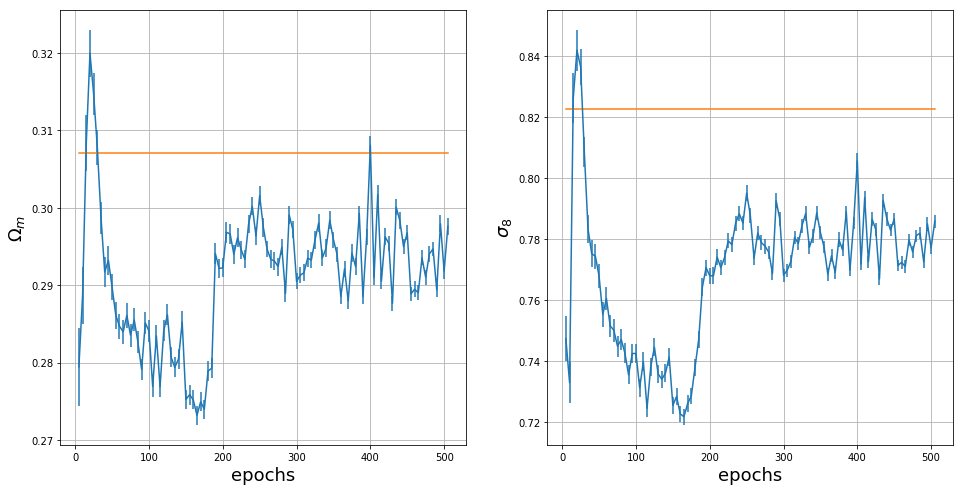

In [5]:
rlts = array(rlts)
fig, axs = subplots(1,2, figsize=(16,8)); ax1, ax2 = axs
ax1.errorbar(epochs_list, rlts[:,0], rlts[:,1])
ax1.plot(epochs_list, [0.3071 for xx in epochs_list])
ax2.errorbar(epochs_list, rlts[:,2], rlts[:,3])
ax2.plot(epochs_list, [0.8228 for xx in epochs_list])

ax1.grid();ax2.grid();
ax1.set_ylabel('$\\Omega_m$', fontsize=18)
ax2.set_ylabel('$\\sigma_8$', fontsize=18)
ax1.set_xlabel('epochs', fontsize=18); ax2.set_xlabel('epochs', fontsize=18)

fig.show()

In [116]:
def binned_erbar(y, nbin = 10):
    ys = np.split(y,nbin)
    ymeans = [yy.mean() for yy in ys]
    yers = [np.sqrt(yy.var()) for yy in ys]
    return ymeans, yers

In [136]:
def learningcurve_single(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-'):
    rlts = []; X = []
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=filename_function(var), do_plot=False); 
            rlts.append([om, omer, sig8, sig8er]); X.append(var)
        except:
            pass
    rlts = array(rlts)
    if fig == None:
        fig, axs = subplots(1,2, figsize=(16,8))
    ax1, ax2 = axs
    ax1.errorbar(X, rlts[:,0], rlts[:,1], label=curve_name, ls=ls)
    ax1.plot(X, [0.3071 for xx in X], lw=2, c='k')
    ax2.errorbar(X, rlts[:,2], rlts[:,3], label=curve_name, ls=ls)
    ax2.plot(X, [0.8228 for xx in X], lw=2, c='k')

    ax1.grid(b=True);ax2.grid(b=True);
    ax1.set_ylabel('$\\Omega_m$', fontsize=18)
    ax2.set_ylabel('$\\sigma_8$', fontsize=18)
    ax1.set_xlabel(var_name, fontsize=18); ax2.set_xlabel(var_name, fontsize=18)
    #ax1.legend(fontsize=16)
    fig.show()
    return fig, axs, X, rlts

def learningcurve_grid(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-'):
    rlts = []; X = []
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            oms, sig8s, doms, dsig8s = plot_grid_dict(grid_dict,  do_plot=False)
            #print(oms, sig8s, doms, dsig8s)
            rlts.append([doms.mean(), np.sqrt(doms.var()), dsig8s.mean(), np.sqrt(dsig8s.var())]); 
            X.append(var)
        except:
            pass
    rlts = array(rlts)
    if fig == None:
        fig, axs = subplots(1,2, figsize=(16,8))
    ax1, ax2 = axs
    ax1.errorbar(X, rlts[:,0], rlts[:,1], label=curve_name, ls=ls)
    ax1.plot(X, [0 for xx in X], lw=2, c='k')
    ax2.errorbar(X, rlts[:,2], rlts[:,3], label=curve_name, ls=ls)
    ax2.plot(X, [0 for xx in X], lw=2, c='k')

    ax1.grid(b=True);ax2.grid(b=True);
    ax1.set_ylabel('$\\Delta \\Omega_m$ (predict - true)', fontsize=18)
    ax2.set_ylabel('$\\Delta \\sigma_8$ (predict - true)', fontsize=18)
    ax1.set_xlabel(var_name, fontsize=18); ax2.set_xlabel(var_name, fontsize=18)
    ax1.legend(fontsize=16)
    fig.show()
    return fig, axs, X, rlts

def learningcurve(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-', single_plot_rat = None, polyfit_deg=6, nbin=10):
    
    X1, X2, rlts1, rlts2, rlts3, rlts4 = [], [], [], [], [], []
    
    if single_plot_rat == None: 
        single_plot_rat = 3.05
    single_plot_skip = int(len(var_list) / single_plot_rat)
    
    if fig == None:
        fig, axs = subplots(3,2, figsize=(16,16))
    
    ax1, ax2 = axs[0]; ax3, ax4 = axs[1]; ax5, ax6 = axs[2]
    
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=filename_function(var), do_plot=False); 
            rlts1.append([om, omer, sig8, sig8er]); X1.append(var)
        except:
            pass
        
    ivar = 0
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            oms, sig8s, doms, dsig8s = plot_grid_dict(grid_dict,  do_plot=False)
            rlts2.append([doms.mean(), np.sqrt(doms.var()), dsig8s.mean(), np.sqrt(dsig8s.var())]); 
            X2.append(var)
            if ivar%single_plot_skip == 0:
                #ax5.scatter(oms, doms, s=3 ); ax6.scatter(sig8s, dsig8s, s=3)
                i1 = len(oms)%nbin 
                x1, xer1 = binned_erbar(oms[i1:], nbin=nbin)
                y1, yer1 = binned_erbar(doms[i1:], nbin=nbin)
                x2, xer2 = binned_erbar(sig8s[i1:], nbin=nbin)
                y2, yer2 = binned_erbar(dsig8s[i1:], nbin=nbin)
                ax5.errorbar(x1, y1, yer1, ls=ls, label=curve_name+', '+var_name+'='+str(var))
                ax6.errorbar(x2, y2, yer2, ls=ls, label=curve_name+', '+var_name+'='+str(var))
                if False:
                    poly5, poly6 = np.polyfit(oms, doms, deg=polyfit_deg), \
                        np.polyfit(sig8s, dsig8s, deg=polyfit_deg);
                    X5, X6 = np.linspace(min(oms), max(oms), 100), \
                        np.linspace(min(sig8s), max(sig8s), 100)
                    ax5.plot(X5, np.polyval(poly5, X5), ls=ls, label=curve_name+', '+var_name+'='+str(var)); 
                    ax6.plot(X6, np.polyval(poly6, X6), ls=ls, label=curve_name+', '+var_name+'='+str(var))
            ivar += 1
        except:
            pass
        
    rlts1, rlts2 = array(rlts1), array(rlts2)
    
    ax1.errorbar(X1, rlts1[:,0], rlts1[:,1], label=curve_name, ls=ls)
    ax1.plot(X1, [0.3071 for xx in X1], lw=2, c='k')
    
    ax2.errorbar(X1, rlts1[:,2], rlts1[:,3], label=curve_name, ls=ls)
    ax2.plot(X1, [0.8228 for xx in X1], lw=2, c='k')
    
    ax3.errorbar(X2, rlts2[:,0], rlts2[:,1], label=curve_name, ls=ls)
    ax3.plot(X2, [0 for xx in X2], lw=2, c='k')
    
    ax4.errorbar(X2, rlts2[:,2], rlts2[:,3], label=curve_name, ls=ls)
    ax4.plot(X2, [0 for xx in X2], lw=2, c='k')
    
    ax5.plot(oms, [0 for xx in oms], lw=2, c='k')
    ax6.plot(sig8s, [0 for xx in sig8s], lw=2, c='k')
    
    ax1.set_ylabel('$\\Delta \\Omega_m$ (predict - true)', fontsize=18)
    ax2.set_ylabel('$\\Delta \\sigma_8$ (predict - true)', fontsize=18)
    ax3.set_ylabel('$\\Delta \\Omega_m$ (predict - true)', fontsize=18)
    ax4.set_ylabel('$\\Delta \\sigma_8$ (predict - true)', fontsize=18)
    ax5.set_xlabel(r'$\Omega_m$', fontsize=18); 
    ax5.set_ylabel(r'$\Delta \Omega_m$', fontsize=18); 
    ax6.set_xlabel(r'$\sigma_8$', fontsize=18); 
    ax6.set_ylabel(r'$\Delta \sigma_8$', fontsize=18); 

    for ax in [ax1, ax2]:
        ax.text(0.02, 0.95, 'single cosmology test', horizontalalignment='left',
                transform=ax.transAxes, fontsize=12)
    for ax in [ax3, ax4, ax5, ax6]:
        ax.text(0.02, 0.95, 'multi cosmology test', horizontalalignment='left', 
                transform=ax.transAxes, fontsize=12)
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_xlabel(var_name, fontsize=18); ax.grid(b=True); 
        ax.legend(fontsize=12, )
    fig.tight_layout()
    fig.show()
    return fig, axs, X1, rlts1, X2, rlts2

##### default settings

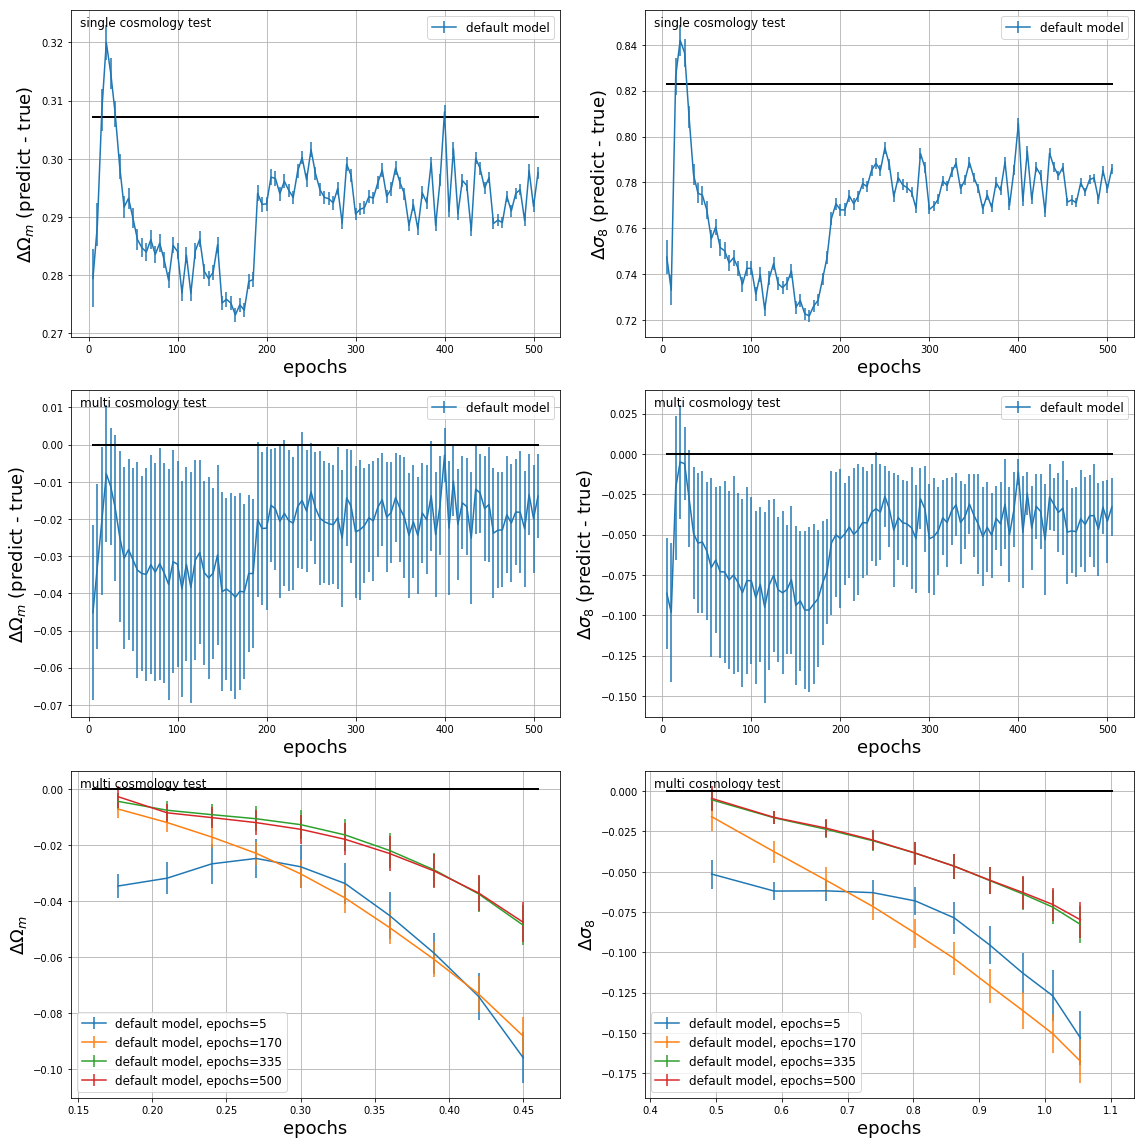

In [137]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

##### sgd

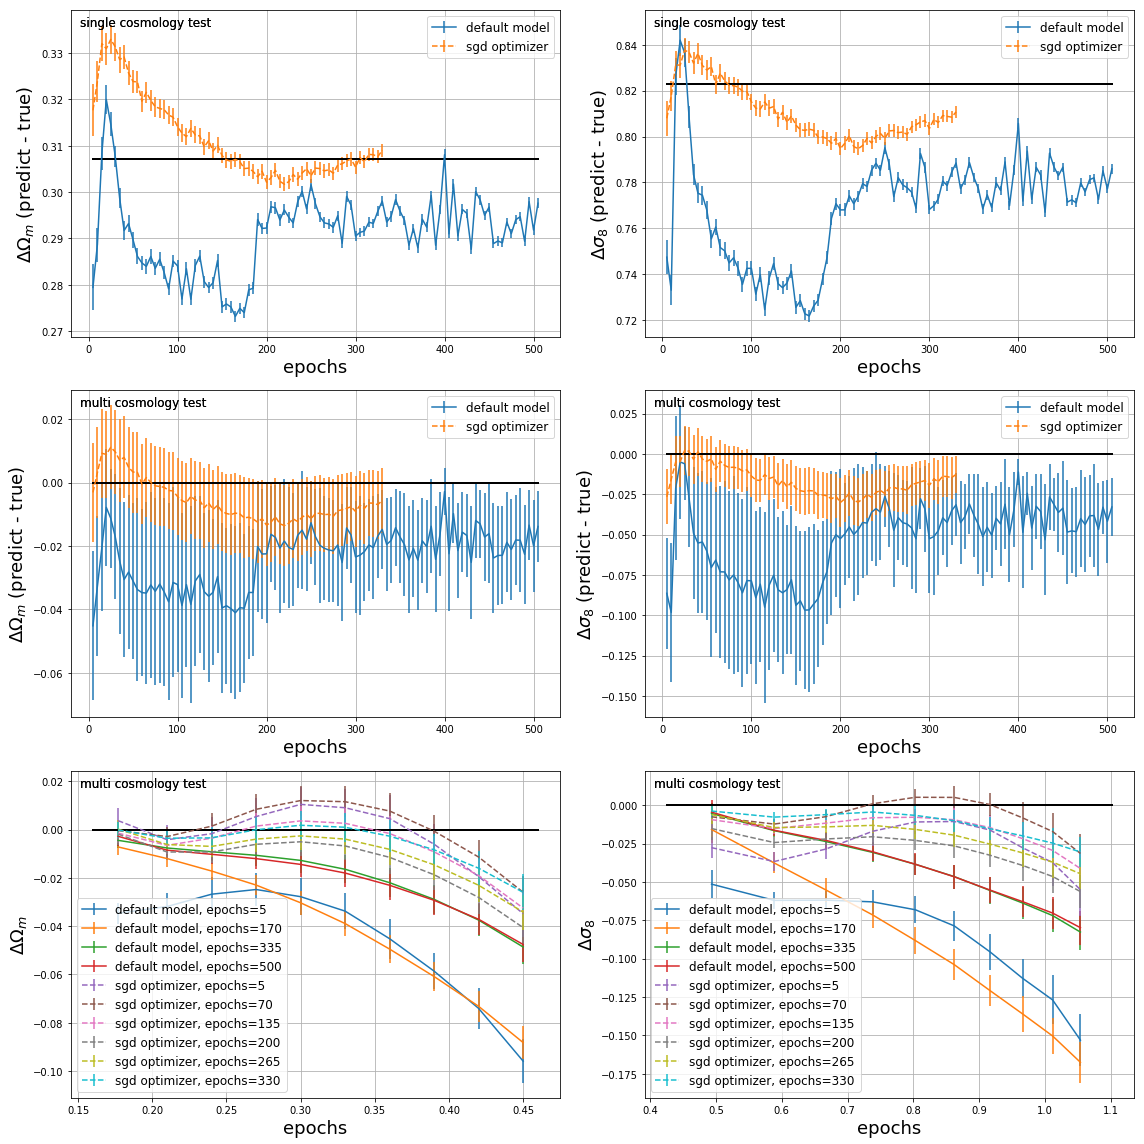

In [138]:
def filename_function(epochs):
    return 'sgd/'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,335,5), var_name = 'epochs', single_plot_rat=5,
                  curve_name = 'sgd optimizer', fig=fig, axs=axs, ls='--')
fig.savefig('sgd.png', format='png')
fig

##### default, laptop

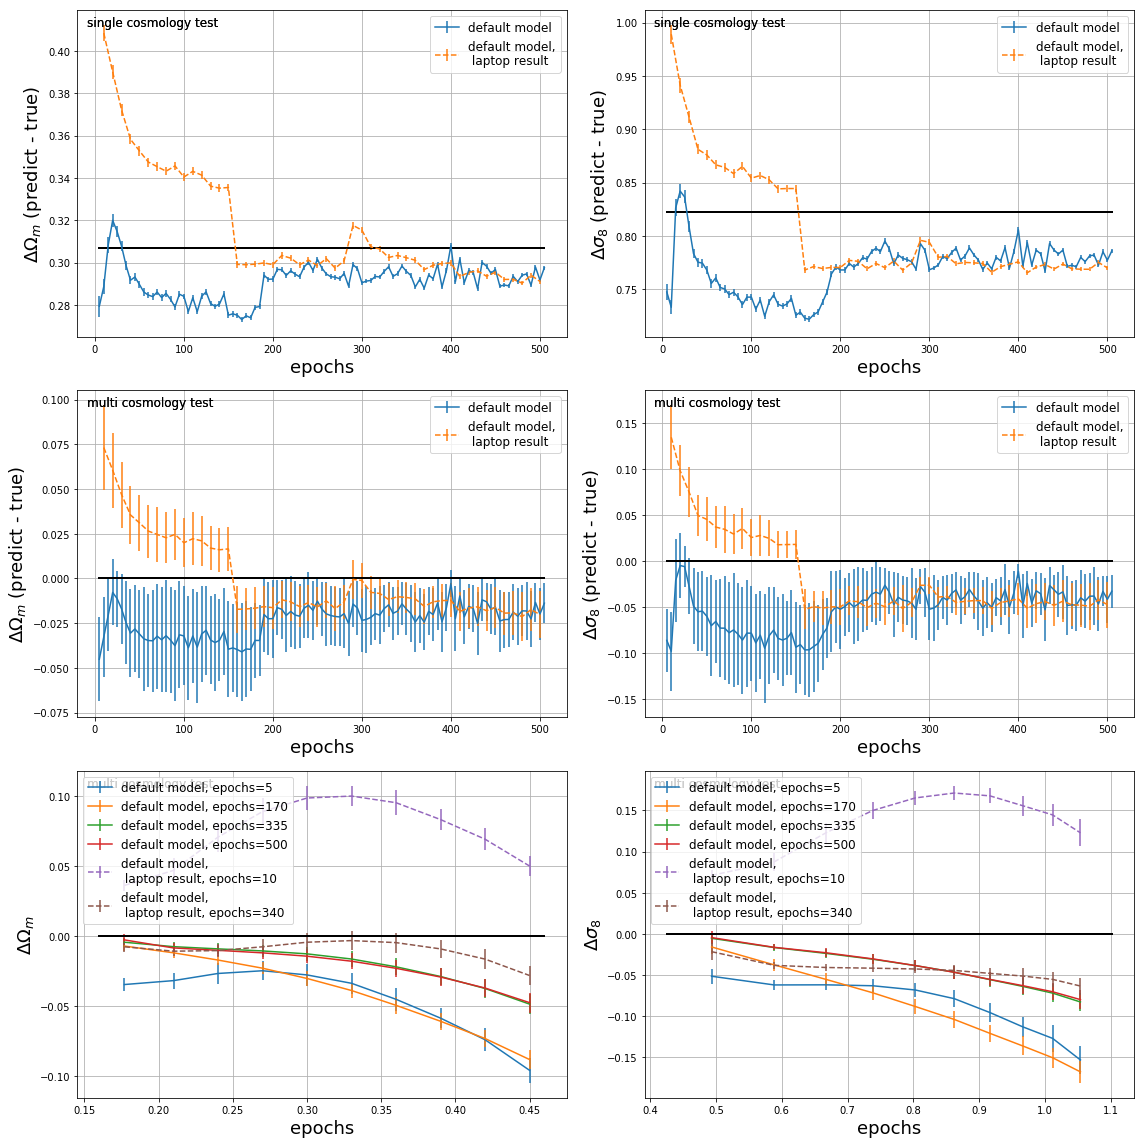

In [139]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return 'epochs_xiaodonglaptop/'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model,\n laptop result', fig=fig, axs=axs, ls='--')
fig.savefig('laptopresult.png', format='png')

##### max pooling

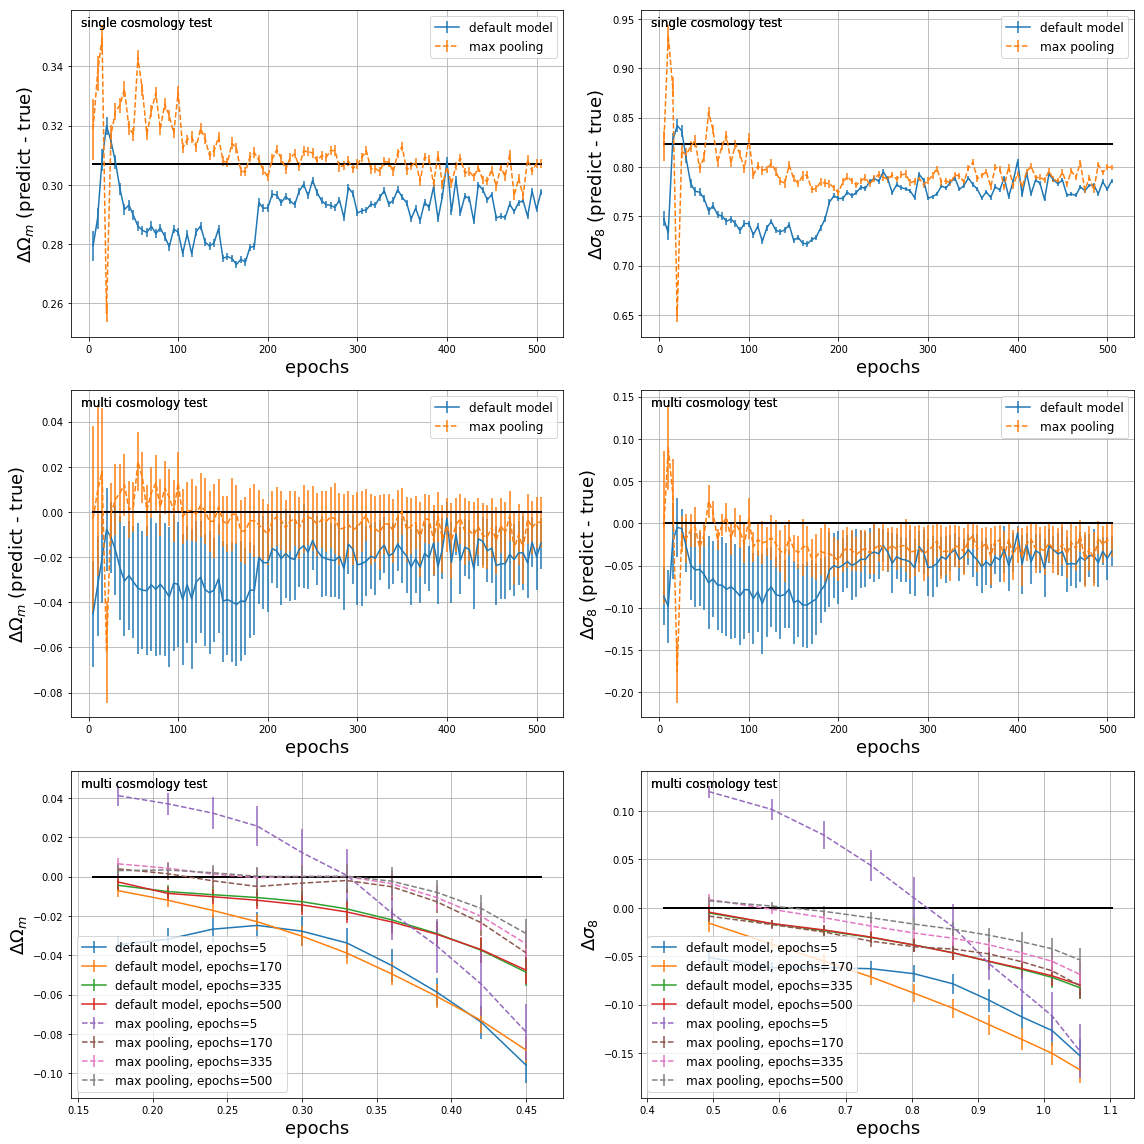

In [140]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return 'max_pooling/'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'max pooling', fig=fig, axs=axs, ls='--')
fig.savefig('maxpool.png', format='png')

##### half filter

In [ ]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return 'half_filters//'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'half filters', fig=fig, axs=axs, ls='--')
fig.savefig('halffilters.png', format='png')


##### half dense neurons

In [ ]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return 'half_dense/'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'half dense', fig=fig, axs=axs, ls='--')
fig.savefig('halfdense.png', format='png')


##### pan models

In [ ]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return 'pan_Adam_lr=0.0005//'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'pan Adam lr=0.0005', fig=fig, axs=axs, ls='--')
fig.savefig('panAdam.png', format='png')

##### test size 0

In [ ]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

def filename_function(epochs):
    return './test_size_0.0/'+str(epochs)+'.save.test_output'
fig, axs, X1, rlts1, X2, rlts2 = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'test_size_0', fig=fig, axs=axs, ls='--')
fig.savefig('testsize0.png', format='png')

## Grid test

##### single epoch test

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


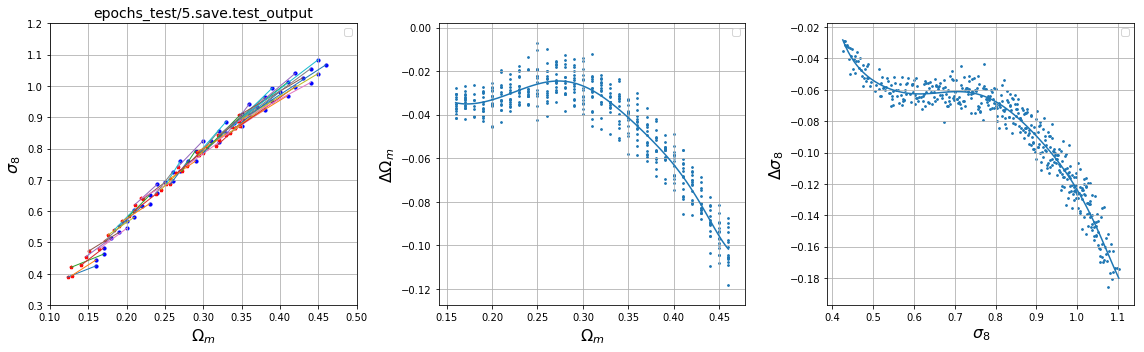

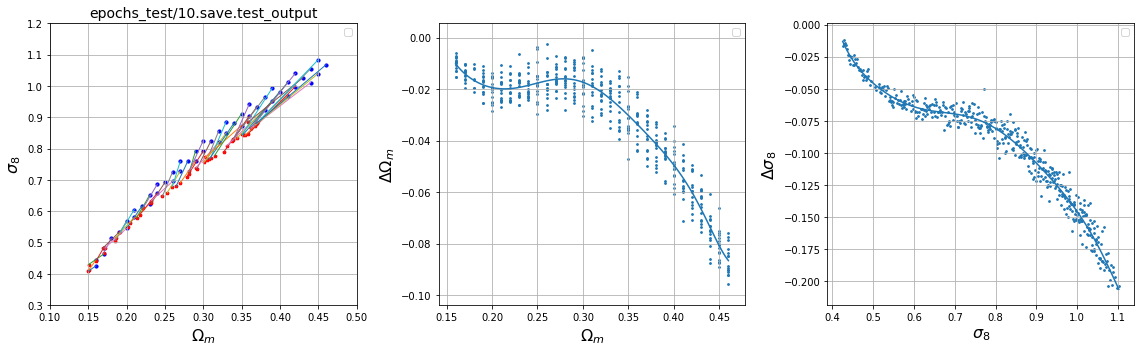

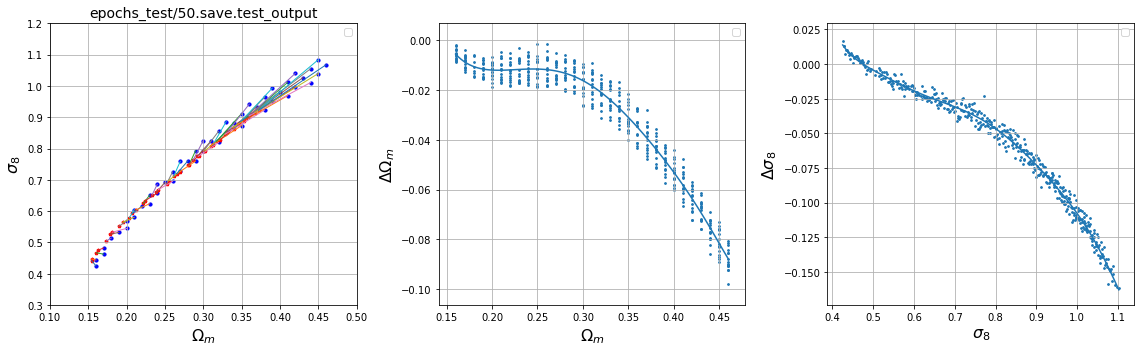

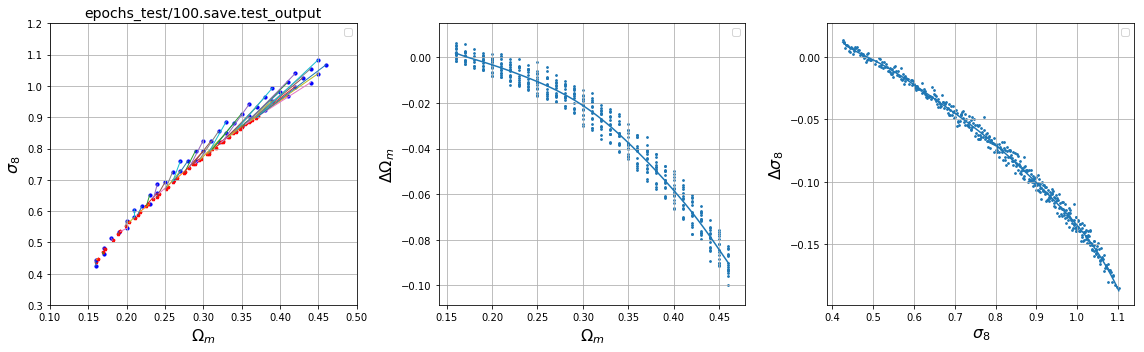

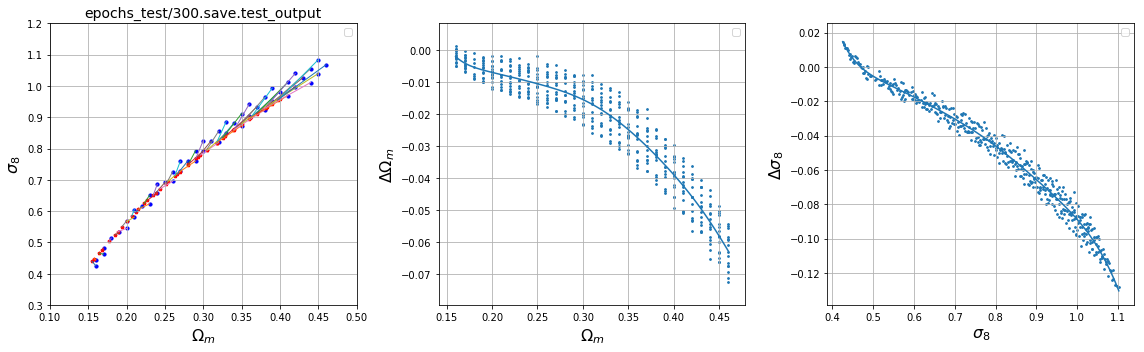

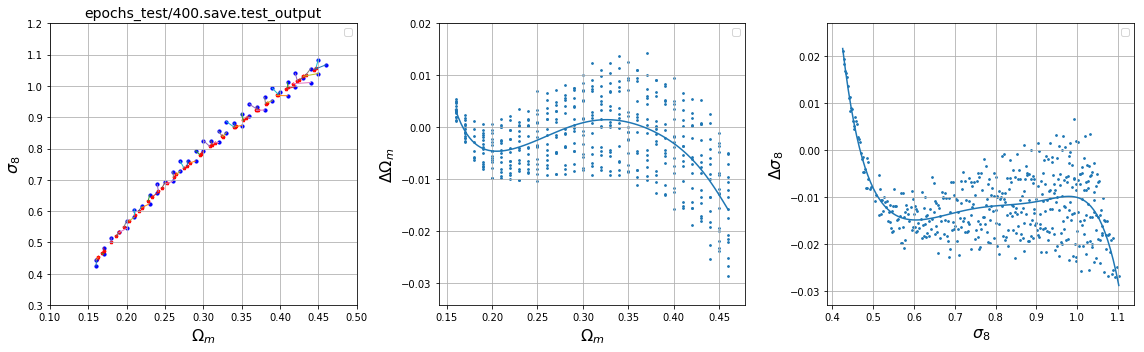

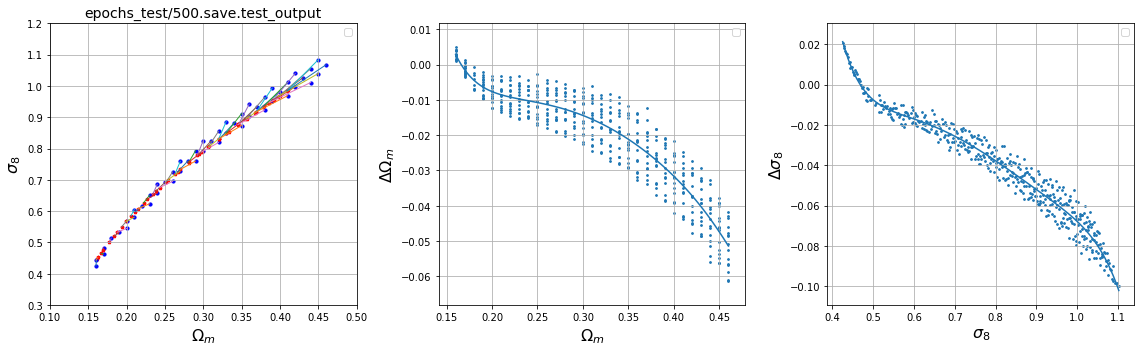

In [115]:
epochs_list = [5, 10, 50, 100, 300, 400, 500]
rlts = []
for epochs in epochs_list:
    file = 'epochs_test/'+str(epochs)+'.save.test_output'
    bigmd_dict, grid_dict = load_testfile(file)
    #oms, sig8s, doms, dsig8s = plot_grid_dict(grid_dict, title=file)
    rlts.append(plot_grid_dict(grid_dict, title=file))

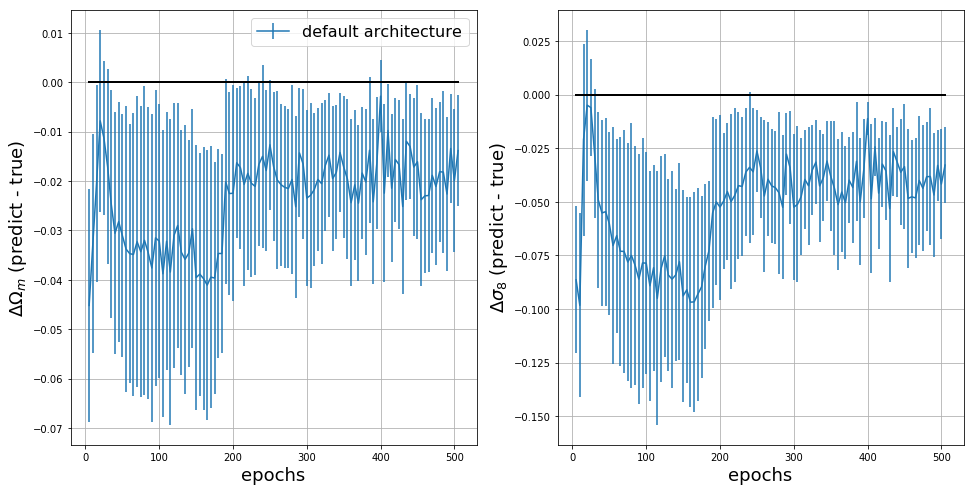

In [110]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve_grid(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default architecture')

In [1]:
def learningcurve_single(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-'):
    rlts = []; X = []
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=filename_function(var), do_plot=False); 
            rlts.append([om, omer, sig8, sig8er]); X.append(var)
        except:
            pass
    rlts = array(rlts)
    if fig == None:
        fig, axs = subplots(1,2, figsize=(16,8))
    ax1, ax2 = axs
    ax1.errorbar(X, rlts[:,0], rlts[:,1], label=curve_name, ls=ls)
    ax1.plot(X, [0.3071 for xx in X], lw=2, c='k')
    ax2.errorbar(X, rlts[:,2], rlts[:,3], label=curve_name, ls=ls)
    ax2.plot(X, [0.8228 for xx in X], lw=2, c='k')

    ax1.grid(b=True);ax2.grid(b=True);
    ax1.set_ylabel('$\\Omega_m$', fontsize=18)
    ax2.set_ylabel('$\\sigma_8$', fontsize=18)
    ax1.set_xlabel(var_name, fontsize=18); ax2.set_xlabel(var_name, fontsize=18)
    #ax1.legend(fontsize=16)
    fig.show()
    return fig, axs, X, rlts